In [1]:
# Import Libraries
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
from numpy import median, mean ,sum

#Statistics Library
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE 


In [2]:
#Read the csv file with utf-8 decoding
dfcolraw = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/Colonoscopyrecords.csv')
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID
0,1,69,19/03/2013,M,19
1,2,69,12/03/2013,F,19
2,3,69,05/03/2013,F,19
3,4,69,12/03/2013,M,19
4,5,69,12/03/2013,M,19


In [3]:
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41391 entries, 0 to 41390
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             41391 non-null  int64 
 1   Age            41391 non-null  int64 
 2   proceduredate  41391 non-null  object
 3   Gender         41391 non-null  object
 4   CLINICID       41391 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [4]:
dfcolraw.shape

(41391, 5)

In [5]:
dfcolavg=dfcolraw.groupby(['Age','proceduredate'])['ID'].count()


In [6]:
dfcolavg=pd.DataFrame(dfcolavg)

In [7]:
dfcolavg

ID
Age proceduredate    
53  25/07/2018      1
57  29/04/2015      1
58  07/02/2018      1
59  02/03/2017      1
    09/07/2018      1
...                ..
79  29/01/2023      2
80  02/03/2023      1
    12/07/2023      1
    14/12/2022      1
    15/05/2023      1

[21268 rows x 1 columns]

In [8]:
dfcolage=dfcolraw.groupby(['Age'])['ID'].count()

In [9]:
dfcolage.shape

(25,)

In [10]:
dfcolage.describe()

count      25.000000
mean     1655.640000
std      1684.220168
min         1.000000
25%        62.000000
50%       927.000000
75%      3160.000000
max      4915.000000
Name: ID, dtype: float64

In [11]:
dfcolage=pd.DataFrame(dfcolage).reset_index()

In [12]:
dfcolage

,Age,ID
0,53,1
1,57,1
2,58,1
3,59,4
4,60,3160
5,61,1716
6,62,2571
7,63,3281
8,64,3121
9,65,3386


In [13]:
dfcolraw.shape

(41391, 5)

In [14]:
dfcolraw['proceduredate']=pd.to_datetime(dfcolraw['proceduredate'])
dfcolraw['proceduredate'] =pd.to_datetime(dfcolraw['proceduredate'].dt.strftime('%d/%m/%Y'))


In [15]:
#Create a new column in dataframe that has the value of date and month combination
dfcolraw['day'] = [x.day for x in dfcolraw['proceduredate']]
dfcolraw['month'] = [x.month for x in dfcolraw['proceduredate']]
dfcolraw['year'] = [x.year for x in dfcolraw['proceduredate']]

# Display first five records
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year
0,1,69,2013-03-19,M,19,19,3,2013
1,2,69,2013-03-12,F,19,12,3,2013
2,3,69,2013-03-05,F,19,5,3,2013
3,4,69,2013-03-12,M,19,12,3,2013
4,5,69,2013-03-12,M,19,12,3,2013


In [16]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolraw['Monthname'] = dfcolraw['month'].map(monthsmap)
# Display first five records
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar


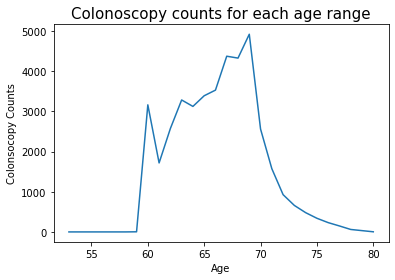

In [17]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

# define data values
x = dfcolage['Age']
y = dfcolage['ID']

plt.plot(x, y) # Plot the chart
plt.xlabel('Age')
plt.ylabel('Colonsocopy Counts')
plt.title('Colonoscopy counts for each age range', fontsize=15)

plt.show() # display

In [18]:
#Create dataframe for each date
dfcoldate=dfcolraw.groupby(['proceduredate'])['ID'].agg(["count"]).reset_index()

In [19]:
dfcoldate

,proceduredate,count
0,2012-12-03,1
1,2013-02-20,3
2,2013-02-25,1
3,2013-03-01,3
4,2013-03-04,3
...,...,...
2693,2023-07-06,28
2694,2023-07-07,9
2695,2023-07-10,23
2696,2023-07-11,14


In [20]:
#Create dataframe for each Unit
dfcolclinic=dfcolraw.groupby(['CLINICID','Age'])['ID'].agg(["count"]).reset_index()

In [21]:
dfcolclinic

,CLINICID,Age,count
0,1,60,477
1,1,61,226
2,1,62,285
3,1,63,512
4,1,64,400
...,...,...,...
319,24,76,11
320,24,77,9
321,24,78,1
322,24,79,5


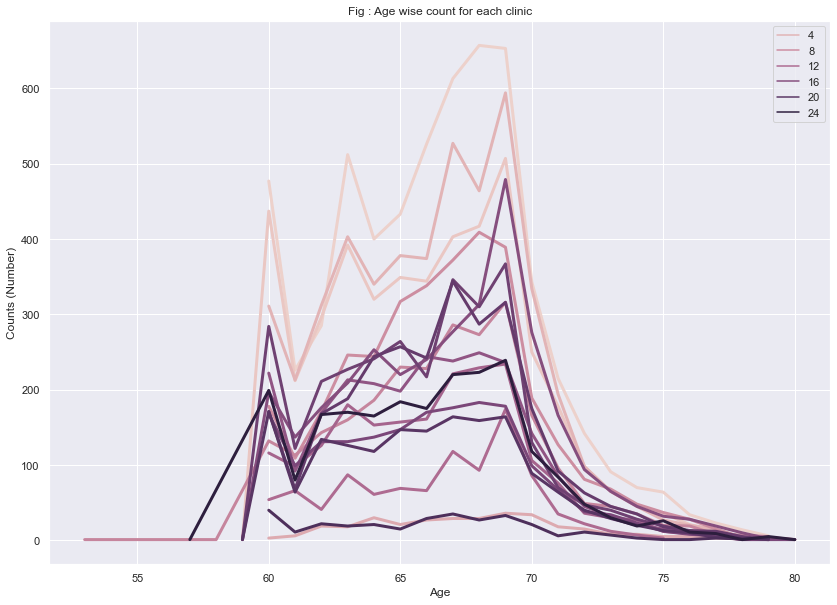

In [22]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcolclinic, x ='Age', y = 'count',
                  hue='CLINICID', lw=3) # Draw the plot

plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot

In [23]:
#Create dataframe for each Unit
dfcolagegender=dfcolraw.groupby(['Age','Gender'])['ID'].agg(["count"]).reset_index()

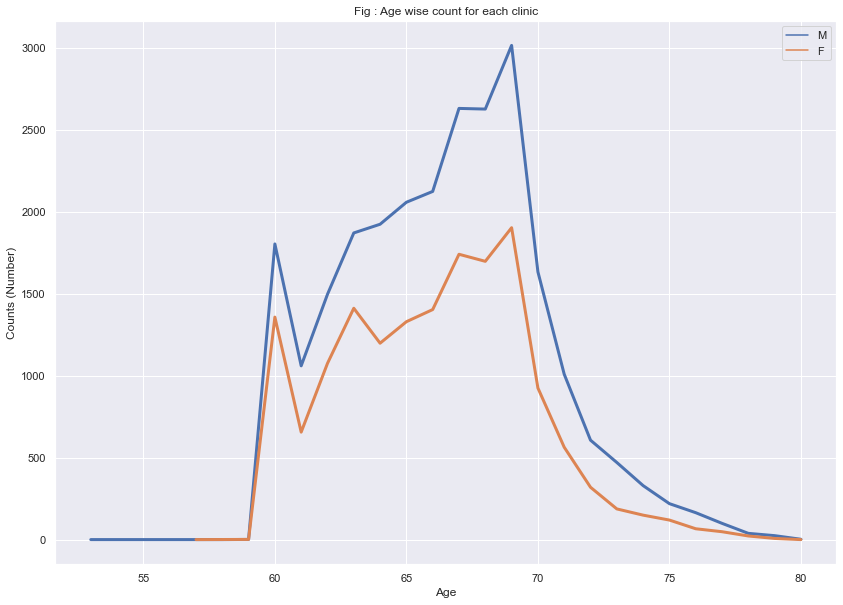

In [24]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcolagegender, x ='Age', y = 'count',
                  hue='Gender', lw=3) # Draw the plot

plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot

Text(0.5, 1.0, 'Box plot Administration')

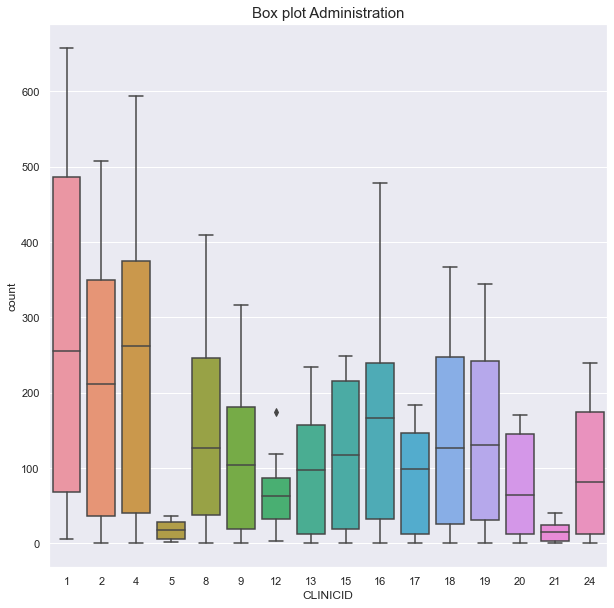

In [25]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'CLINICID', y ='count', data=dfcolclinic)
plt.title('Box plot Administration', fontsize=15)

Text(0.5, 1.0, 'Box plot Administration')

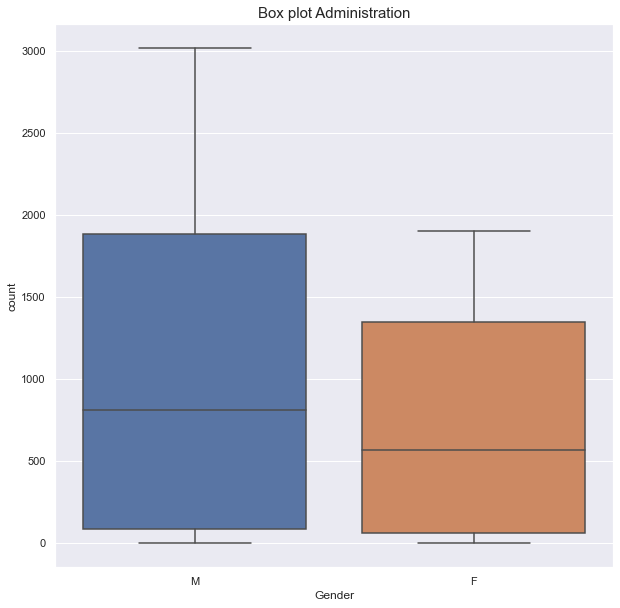

In [26]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'Gender', y ='count', data=dfcolagegender)
plt.title('Box plot Administration', fontsize=15)

Text(0.5, 1.0, 'Box plot Administration')

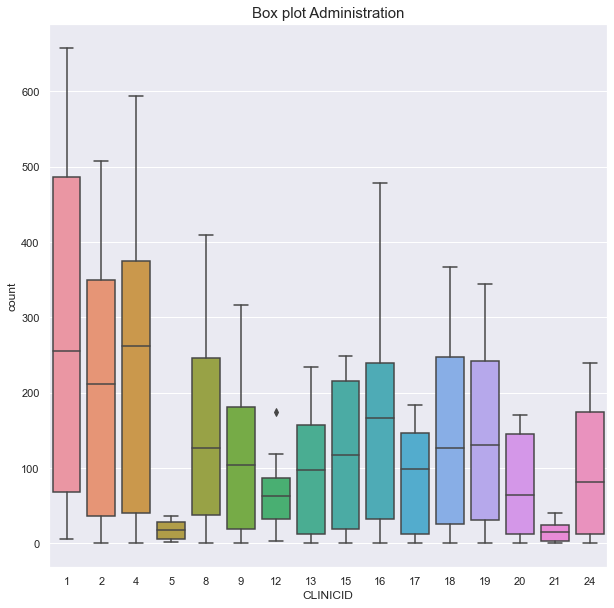

In [27]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'CLINICID', y ='count', data=dfcolclinic)
plt.title('Box plot Administration', fontsize=15)

In [28]:
#Create dataframe for each Unit
dfcolclinicpd=dfcolraw.groupby(['CLINICID','Age','proceduredate','Gender'])['ID'].agg(["count"]).reset_index()
dfcolclinicpd

,CLINICID,Age,proceduredate,Gender,count
0,1,60,2016-06-21,M,1
1,1,60,2016-07-12,M,1
2,1,60,2016-07-26,M,1
3,1,60,2016-08-09,M,1
4,1,60,2016-08-16,M,1
...,...,...,...,...,...
38000,24,79,2023-02-11,F,1
38001,24,79,2023-02-11,M,1
38002,24,79,2023-06-14,M,1
38003,24,79,2023-06-28,F,1


In [29]:
dfcolclinicpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38005 entries, 0 to 38004
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CLINICID       38005 non-null  int64         
 1   Age            38005 non-null  int64         
 2   proceduredate  38005 non-null  datetime64[ns]
 3   Gender         38005 non-null  object        
 4   count          38005 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ MB


In [30]:
dfcolclinicpd['proceduredate']=pd.to_datetime(dfcolclinicpd['proceduredate'])
dfcolclinicpd['proceduredate'] =pd.to_datetime(dfcolclinicpd['proceduredate'].dt.strftime('%d/%m/%Y'))


In [31]:
#Create a new column in dataframe that has the value of date and month combination
dfcolclinicpd['day'] = [x.day for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['month'] = [x.month for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['year'] = [x.year for x in dfcolclinicpd['proceduredate']]

# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year
0,1,60,2016-06-21,M,1,21,6,2016
1,1,60,2016-12-07,M,1,7,12,2016
2,1,60,2016-07-26,M,1,26,7,2016
3,1,60,2016-09-08,M,1,8,9,2016
4,1,60,2016-08-16,M,1,16,8,2016


In [32]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolclinicpd['Monthname'] = dfcolclinicpd['month'].map(monthsmap)
# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year,Monthname
0,1,60,2016-06-21,M,1,21,6,2016,June
1,1,60,2016-12-07,M,1,7,12,2016,Dec
2,1,60,2016-07-26,M,1,26,7,2016,July
3,1,60,2016-09-08,M,1,8,9,2016,Sep
4,1,60,2016-08-16,M,1,16,8,2016,Aug


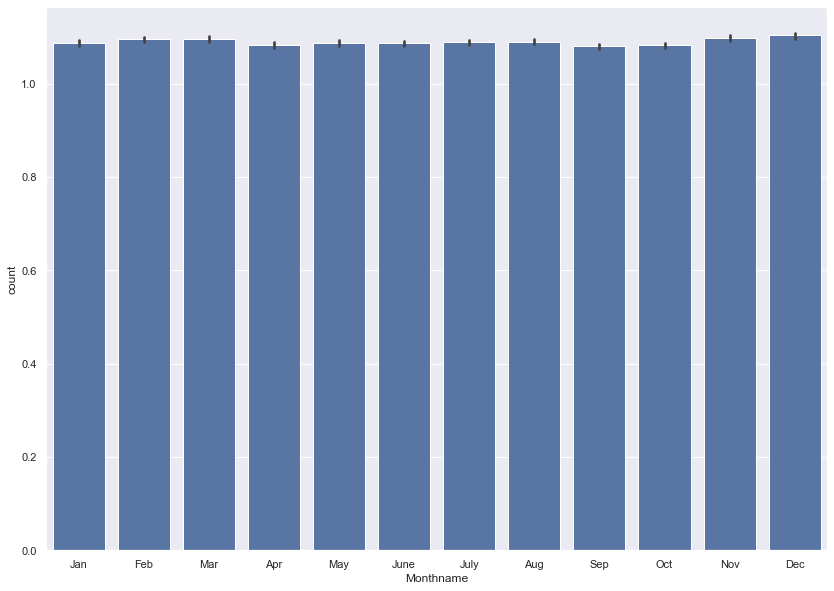

In [33]:
ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

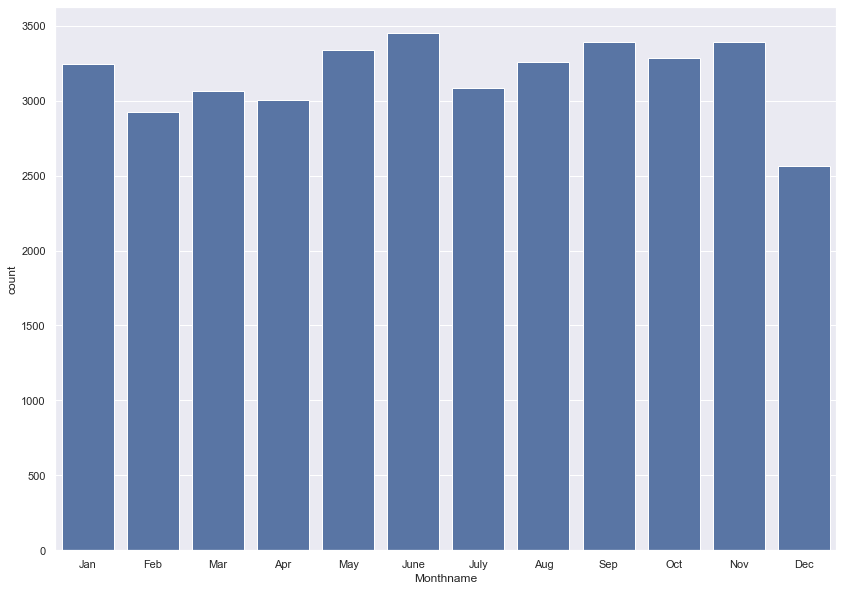

In [34]:
ax = sns.countplot(x="Monthname", data=dfcolclinicpd,  order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

In [35]:
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year,Monthname
0,1,60,2016-06-21,M,1,21,6,2016,June
1,1,60,2016-12-07,M,1,7,12,2016,Dec
2,1,60,2016-07-26,M,1,26,7,2016,July
3,1,60,2016-09-08,M,1,8,9,2016,Sep
4,1,60,2016-08-16,M,1,16,8,2016,Aug


<AxesSubplot:xlabel='Gender', ylabel='count'>

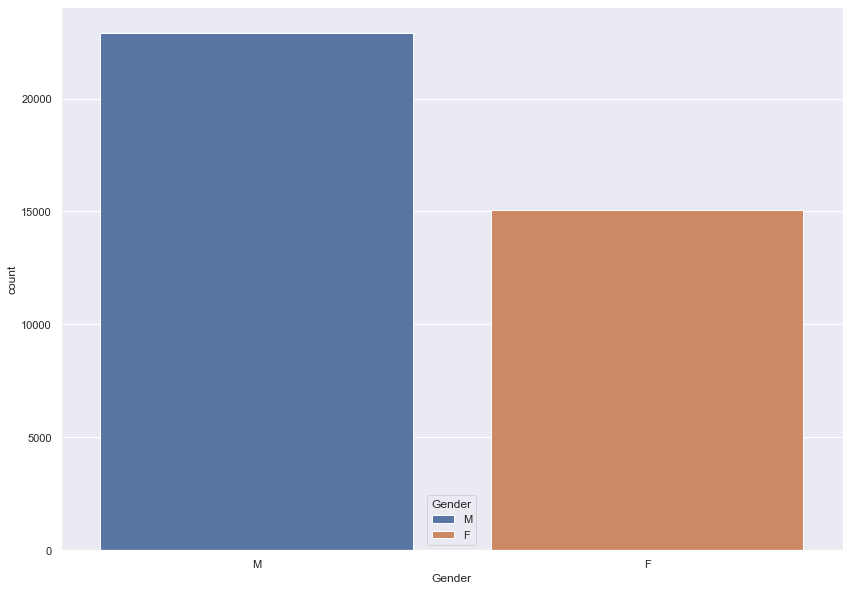

In [36]:
sns.countplot(x='Gender',hue='Gender',data=dfcolclinicpd,dodge=False)


In [37]:
y=dfcolclinicpd.groupby(['Gender'])['Gender'].count()
y

Gender
F    15086
M    22919
Name: Gender, dtype: int64

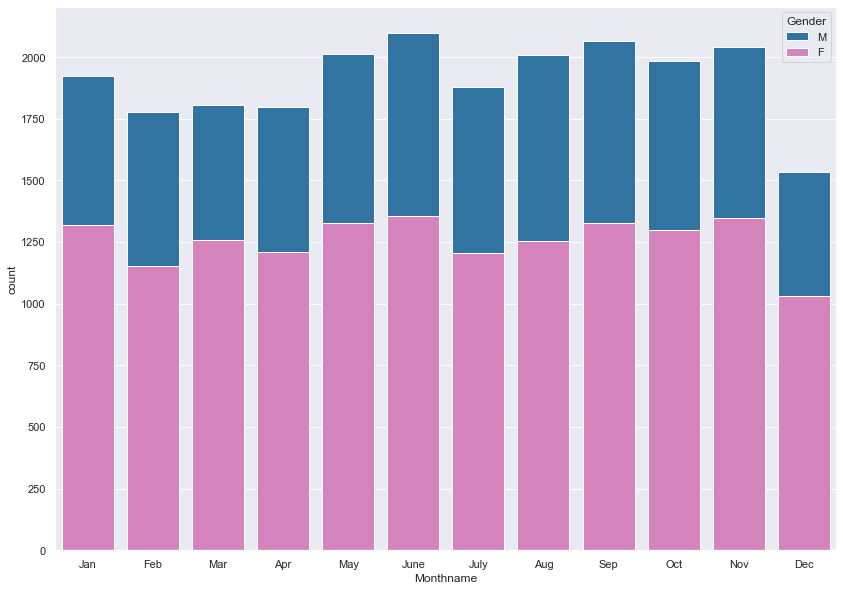

In [38]:
palette = {
    'M': 'tab:blue',
    'F': 'tab:pink',
}
ax= sns.countplot(x='Monthname',hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],data=dfcolclinicpd,dodge=False)

#ax = sns.barplot(x="Monthname", data=dfcolclinicpd,  ci=68,hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

In [39]:
#ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68,hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar
...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,30,6,2023,June
41387,41388,62,2023-07-12,F,18,12,7,2023,July
41388,41389,62,2023-07-12,M,13,12,7,2023,July
41389,41390,80,2023-07-12,M,13,12,7,2023,July


In [40]:
dfcolraw=dfcolraw[(dfcolraw['year'] != 2012)]
dfcolraw=dfcolraw[(dfcolraw['year'] != 2013)]
dfcolraw=dfcolraw[(dfcolraw['year'] != 2020)]
dfcolraw=dfcolraw[(dfcolraw['year'] != 2023)]
dfcolraw=dfcolraw.reset_index(drop=True)
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,3,1,2014,Jan
1,1315,69,2014-01-03,M,9,3,1,2014,Jan
2,1316,68,2014-01-03,F,9,3,1,2014,Jan
3,1319,68,2014-01-03,F,1,3,1,2014,Jan
4,1320,67,2014-01-03,M,1,3,1,2014,Jan
...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,3,12,2022,Dec
33606,38926,65,2022-09-29,F,15,29,9,2022,Sep
33607,38953,71,2022-12-04,F,16,4,12,2022,Dec
33608,38971,66,2022-12-02,M,8,2,12,2022,Dec


In [41]:
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             33610 non-null  int64         
 1   Age            33610 non-null  int64         
 2   proceduredate  33610 non-null  datetime64[ns]
 3   Gender         33610 non-null  object        
 4   CLINICID       33610 non-null  int64         
 5   day            33610 non-null  int64         
 6   month          33610 non-null  int64         
 7   year           33610 non-null  int64         
 8   Monthname      33610 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.3+ MB


In [42]:

dfcolgenageyearaggregate=dfcolraw.groupby(['Gender','Age','year'])['ID'].count().reset_index()
dfcolgenageyearaggregate.tail()

,Gender,Age,year,ID
260,M,77,2021,29
261,M,77,2022,23
262,M,78,2021,10
263,M,78,2022,20
264,M,79,2022,10


In [43]:
dfcolraw.groupby(['year'])['ID'].count()

year
2014    3352
2015    4014
2016    4004
2017    4353
2018    4378
2019    4457
2021    4236
2022    4816
Name: ID, dtype: int64

In [44]:
## Using pivot function, specify the index, columns, and the values. The purpose here is to replace the NaN values, logically for each country and animal type
dflspivot= dfcolgenageyearaggregate.pivot (index=['Gender','Age'],columns='year',values='ID').reset_index()
dflspivot.head()


year,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
0,F,57,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,F,59,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,129.0,185.0
3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,43.0,99.0
4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,93.0,95.0


In [45]:
print( dflspivot.columns) # for columns
print(dflspivot.index) # for row indexes

Index(['Gender', 'Age', 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022], dtype='object', name='year')
RangeIndex(start=0, stop=46, step=1)


In [46]:
#Delete the 2012, 2013 and 2023 data since they are not complete and  might result in incorrect prediction
#dflspivot = dflspivot.drop(dflspivot.columns[[2]],axis=1)
#dflspivot = dflspivot.drop(dflspivot.columns[[2]],axis=1)
#dflspivot = dflspivot.drop(dflspivot.columns[[8]],axis=1)
#dflspivot = dflspivot.drop(dflspivot.columns[[10]],axis=1)
dflspivot

year,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
0,F,57,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,F,59,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,129.0,185.0
3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,43.0,99.0
4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,93.0,95.0
5,F,63,20.0,222.0,256.0,91.0,196.0,152.0,128.0,178.0
6,F,64,63.0,163.0,126.0,83.0,135.0,121.0,152.0,160.0
7,F,65,85.0,175.0,105.0,154.0,209.0,126.0,174.0,123.0
8,F,66,153.0,223.0,105.0,159.0,152.0,110.0,141.0,146.0
9,F,67,206.0,265.0,96.0,166.0,143.0,158.0,156.0,190.0


In [47]:
#There are more NULL values, these are the cases where for a country for all the years there is nothing submitted, we will mark such NaN as 0.

dflspivot.sort_values(by='Age', inplace=True) 

colnames=dflspivot.columns.values
for i in colnames:
    dflspivot[i] = dflspivot[i].replace(np.nan, 0)

In [48]:
dflspivot.reset_index()

year,index,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
0,23,M,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,F,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,M,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,25,M,59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,F,59,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,26,M,60,1.0,0.0,169.0,374.0,303.0,279.0,168.0,252.0
6,2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,129.0,185.0
7,3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,43.0,99.0
8,27,M,61,3.0,7.0,366.0,160.0,113.0,64.0,73.0,149.0
9,4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,93.0,95.0


In [49]:
print (dflspivot.columns.tolist())

['Gender', 'Age', 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]


In [50]:
dflspivot=dflspivot[['Gender','Age',2014,2015,2016,2017,2018,2019,2021,2022]]
dflspivot.head()

year,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
23,M,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,F,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24,M,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25,M,59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,F,59,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [51]:
dflspivotgt60=dflspivot[['Gender','Age',2016,2017,2018,2019,2021,2022]].loc[dflspivot['Age']>=60]
dflspivotlt69=dflspivotgt60[['Gender','Age',2016,2017,2018,2019,2021,2022]].loc[dflspivotgt60['Age']<=69]
dflspivotlt69.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 26 to 35
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  20 non-null     object 
 1   Age     20 non-null     int64  
 2   2016    20 non-null     float64
 3   2017    20 non-null     float64
 4   2018    20 non-null     float64
 5   2019    20 non-null     float64
 6   2021    20 non-null     float64
 7   2022    20 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ KB


In [52]:
dflspivotlt69['mean'] = dflspivotlt69.iloc[:, 2:8].mean(axis=1)
dflspivotcm=dflspivotlt69.copy()


In [53]:
dflspivotlt69

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,F,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,F,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,M,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,F,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000
28,M,62,216.0,141.0,137.0,313.0,137.0,150.0,182.333333
5,F,63,256.0,91.0,196.0,152.0,128.0,178.0,166.833333
29,M,63,352.0,144.0,263.0,191.0,170.0,208.0,221.333333
6,F,64,126.0,83.0,135.0,121.0,152.0,160.0,129.500000
30,M,64,198.0,119.0,232.0,181.0,278.0,230.0,206.333333


In [54]:
gendermap = {'M':1, 'F':2}
dflspivotcm['Gender'] = dflspivotcm['Gender'].map(gendermap)
dflspivotcm

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,1,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,2,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,2,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,1,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,2,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000
28,1,62,216.0,141.0,137.0,313.0,137.0,150.0,182.333333
5,2,63,256.0,91.0,196.0,152.0,128.0,178.0,166.833333
29,1,63,352.0,144.0,263.0,191.0,170.0,208.0,221.333333
6,2,64,126.0,83.0,135.0,121.0,152.0,160.0,129.500000
30,1,64,198.0,119.0,232.0,181.0,278.0,230.0,206.333333


In [55]:
dflspivotlt69.head()

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,F,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,F,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,M,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,F,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000


year       Age      2016      2017      2018      2019      2021      2022  \
year                                                                         
Age   1.000000 -0.308279  0.200155 -0.000549  0.231453  0.427394  0.417008   
2016 -0.308279  1.000000 -0.098762  0.058134 -0.057872 -0.074930  0.116710   
2017  0.200155 -0.098762  1.000000  0.636784  0.617920  0.424990  0.682446   
2018 -0.000549  0.058134  0.636784  1.000000  0.545108  0.701116  0.603525   
2019  0.231453 -0.057872  0.617920  0.545108  1.000000  0.506240  0.613625   
2021  0.427394 -0.074930  0.424990  0.701116  0.506240  1.000000  0.639758   
2022  0.417008  0.116710  0.682446  0.603525  0.613625  0.639758  1.000000   
mean  0.203712  0.247763  0.782048  0.832791  0.774436  0.731995  0.846526   

year      mean  
year            
Age   0.203712  
2016  0.247763  
2017  0.782048  
2018  0.832791  
2019  0.774436  
2021  0.731995  
2022  0.846526  
mean  1.000000  


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}, xlabel='year', ylabel='year'>

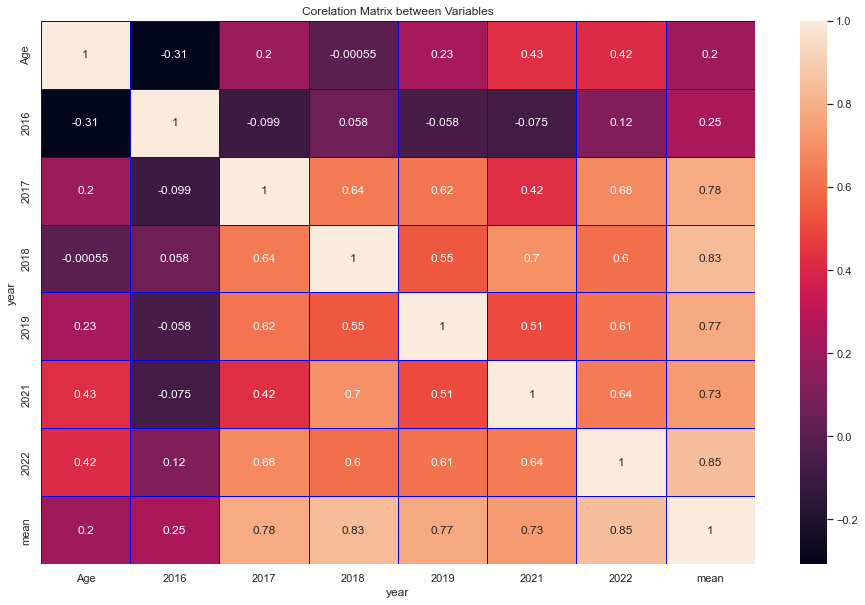

In [56]:
#Plot the co-relation matrix
correlation = dflspivotlt69.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [57]:
dflspivotcm2=dfcolraw.copy()
dflspivotcm2.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,3,1,2014,Jan
1,1315,69,2014-01-03,M,9,3,1,2014,Jan
2,1316,68,2014-01-03,F,9,3,1,2014,Jan
3,1319,68,2014-01-03,F,1,3,1,2014,Jan
4,1320,67,2014-01-03,M,1,3,1,2014,Jan


In [58]:
dflspivotcm2=dflspivotcm2[['ID','Age','Gender','month']]
dflspivotcm2['Gender'] = dflspivotcm2['Gender'].map(gendermap)
dflspivotcm2=dflspivotcm2.groupby(['Age','Gender','month'])['ID'].count().reset_index()

dflspivotcm2

,Age,Gender,month,ID
0,53,1,7,1
1,57,2,4,1
2,58,1,2,1
3,59,1,3,1
4,59,1,7,1
...,...,...,...,...
465,79,2,8,1
466,79,2,10,1
467,79,2,11,1
468,79,2,12,1


             Age    Gender     month        ID
Age     1.000000 -0.010767  0.050310 -0.624869
Gender -0.010767  1.000000  0.019298 -0.248625
month   0.050310  0.019298  1.000000  0.043801
ID     -0.624869 -0.248625  0.043801  1.000000


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}>

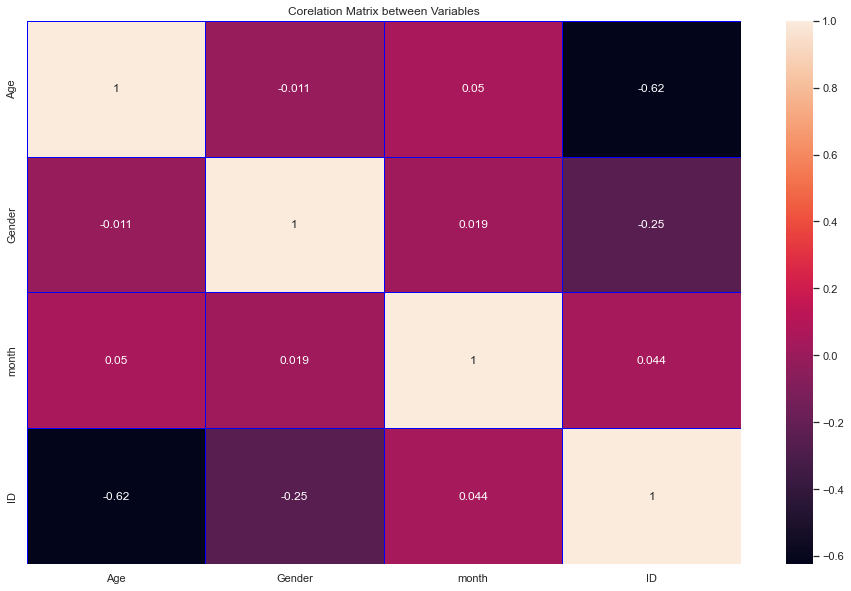

In [59]:
#Plot the co-relation matrix
correlation = dflspivotcm2.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [60]:
dfcolmean=dflspivotlt69[['Gender','Age','mean']]
dfcolmean

year,Gender,Age,mean
26,M,60,257.500000
2,F,60,192.833333
3,F,61,94.333333
27,M,61,154.166667
4,F,62,133.000000
28,M,62,182.333333
5,F,63,166.833333
29,M,63,221.333333
6,F,64,129.500000
30,M,64,206.333333


In [61]:
#Import Census Data

#Read the csv file with utf-8 decoding
dfcensusm = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/EligiblePopulation_Male_Msc.csv')
dfcensusf = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/EligiblePopulation_Female_Msc.csv')



dfcensusm

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E
0,40,M,40301,41401,41644,39275,37940,37710,37289,37053,36472,36650
1,41,M,41401,41644,39275,37940,37710,37289,37053,36472,36650,36050
2,42,M,41644,39275,37940,37710,37289,37053,36472,36650,36050,34926
3,43,M,39275,37940,37710,37289,37053,36472,36650,36050,34926,34356
4,44,M,37940,37710,37289,37053,36472,36650,36050,34926,34356,32611
5,45,M,37710,37289,37053,36472,36650,36050,34926,34356,32611,32050
6,46,M,37289,37053,36472,36650,36050,34926,34356,32611,32050,31353
7,47,M,37053,36472,36650,36050,34926,34356,32611,32050,31353,30684
8,48,M,36472,36650,36050,34926,34356,32611,32050,31353,30684,30891
9,49,M,36650,36050,34926,34356,32611,32050,31353,30684,30891,29775


In [62]:
dfcensusm['meanE'] = dfcensusm.iloc[:, 2:8].mean(axis=1) # Only until 2014 is considered for mean
dfcensusm.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E,meanE
0,40,M,40301,41401,41644,39275,37940,37710,37289,37053,36472,36650,39711.833333
1,41,M,41401,41644,39275,37940,37710,37289,37053,36472,36650,36050,39209.833333
2,42,M,41644,39275,37940,37710,37289,37053,36472,36650,36050,34926,38485.166667
3,43,M,39275,37940,37710,37289,37053,36472,36650,36050,34926,34356,37623.166667
4,44,M,37940,37710,37289,37053,36472,36650,36050,34926,34356,32611,37185.666667


In [63]:
dfcensusf['meanE'] = dfcensusf.iloc[:, 2:8].mean(axis=1) # Only until 2014 is considered for mean
dfcensusf.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E,meanE
0,40,F,43143,43696,43337,41408,39379,38506,38127,37471,37145,37081,41578.166667
1,41,F,43696,43337,41408,39379,38506,38127,37471,37145,37081,36199,40742.166667
2,42,F,43337,41408,39379,38506,38127,37471,37145,37081,36199,35025,39704.666667
3,43,F,41408,39379,38506,38127,37471,37145,37081,36199,35025,34414,38672.666667
4,44,F,39379,38506,38127,37471,37145,37081,36199,35025,34414,32204,37951.500000


In [64]:
#Data frame to only take mean
dfcensusmmean=dfcensusm[['Age','Gender','meanE']]
dfcensusfmean=dfcensusf[['Age','Gender','meanE']]

In [65]:
#Let us take mean data for the eligible population in census
dfcensusmmean=dfcensusmmean.loc[dfcensusm['Age']>=60]
dfcensusmmean

,Age,Gender,meanE
20,60,M,26555.166667
21,61,M,25772.500000
22,62,M,25068.833333
23,63,M,24299.833333
24,64,M,23751.500000
25,65,M,23105.833333
26,66,M,22364.000000
27,67,M,21731.666667
28,68,M,20980.666667
29,69,M,20312.500000


In [66]:
#dfcensusmmean=dfcensusmmean.loc[dfcensusm2019['Age']<70]


In [67]:
#Let us take 2019 data which is most reliable since it is latest year pre-covid and expect same tendency to continue from 2024 if the age range is untouched.
dfcensusf2019=dfcensusf[['Age','Gender','2019E']].loc[dfcensusf['Age']>=60]
dfcensusf2019=dfcensusf2019[['Age','Gender','2019E']].loc[dfcensusf2019['Age']<70]
dfcensusf2019

,Age,Gender,2019E
20,60,F,26312
21,61,F,26109
22,62,F,25183
23,63,F,24662
24,64,F,24524
25,65,F,23018
26,66,F,23375
27,67,F,21897
28,68,F,21236
29,69,F,21159


In [68]:
dfcensusmean = [dfcensusmmean, dfcensusfmean]

In [69]:
dfcensusmean=pd.concat(dfcensusmean)


In [70]:
dfcensusmean.reset_index(drop=True)


,Age,Gender,meanE
0,60,M,26555.166667
1,61,M,25772.500000
2,62,M,25068.833333
3,63,M,24299.833333
4,64,M,23751.500000
...,...,...,...
77,86,F,4906.666667
78,87,F,3656.500000
79,88,F,2528.833333
80,89,F,1541.000000


In [71]:
dfcolmean.reset_index(drop=True)

year,Gender,Age,mean
0,M,60,257.500000
1,F,60,192.833333
2,F,61,94.333333
3,M,61,154.166667
4,F,62,133.000000
5,M,62,182.333333
6,F,63,166.833333
7,M,63,221.333333
8,F,64,129.500000
9,M,64,206.333333


In [72]:
print( dfcolmean.columns) # for columns
#print(dfcolmean.index) # for row indexes

Index(['Gender', 'Age', 'mean'], dtype='object', name='year')


In [73]:
dfcolmean = dfcolmean.rename_axis(columns=None)
dfcolmean.reset_index(drop=True)

,Gender,Age,mean
0,M,60,257.500000
1,F,60,192.833333
2,F,61,94.333333
3,M,61,154.166667
4,F,62,133.000000
5,M,62,182.333333
6,F,63,166.833333
7,M,63,221.333333
8,F,64,129.500000
9,M,64,206.333333


In [74]:
dfcolmean.reset_index(inplace=True, drop=True)
dfcensusmean.reset_index(inplace=True, drop=True)

In [75]:
dfcensusmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     82 non-null     int64  
 1   Gender  82 non-null     object 
 2   meanE   82 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [76]:
result = pd.merge(dfcolmean, dfcensusmean, on=["Age", "Gender"])

In [77]:
result['percent']=result['mean']*100/result['meanE']

In [78]:
result

,Gender,Age,mean,meanE,percent
0,M,60,257.500000,26555.166667,0.969679
1,F,60,192.833333,27237.000000,0.707983
2,F,61,94.333333,26503.500000,0.355928
3,M,61,154.166667,25772.500000,0.598183
4,F,62,133.000000,25781.500000,0.515874
5,M,62,182.333333,25068.833333,0.727331
6,F,63,166.833333,24968.000000,0.668189
7,M,63,221.333333,24299.833333,0.910843
8,F,64,129.500000,24478.500000,0.529036
9,M,64,206.333333,23751.500000,0.868717


In [79]:
result.groupby(['Gender']).mean()


,Age,mean,meanE,percent
Gender,,,,
F,64.5,146.816667,24136.466667,0.613372
M,64.5,219.216667,23394.250000,0.949900


In [80]:
#Data frame to only take mean
dfcensusmall=dfcensusm[['Age','Gender','meanE']]
dfcensusfall=dfcensusf[['Age','Gender','meanE']]

In [81]:
conact1 = [dfcensusmall, dfcensusfall]
dfcensusall=pd.concat(conact1)
dfcensus5569=dfcensusall.loc[(dfcensusall['Age']>=55) & (dfcensusall['Age']<70)]



In [82]:

import numpy as np

dfcensus5569['Projectedcol'] = np.where(dfcensus5569['Gender']=='M', dfcensus5569['meanE']*0.95/100, dfcensus5569['meanE']*0.61/100)

dfcensus5569.reset_index(drop=True,inplace=True)
dfcensus5569

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


                   Age     meanE  Projectedcol
Age           1.000000 -0.991809     -0.501496
meanE        -0.991809  1.000000      0.393390
Projectedcol -0.501496  0.393390      1.000000


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}>

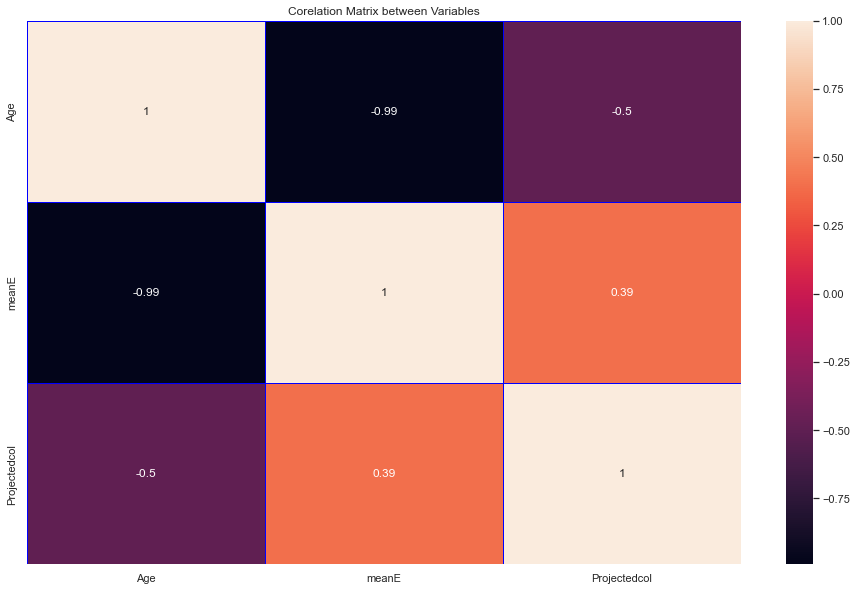

In [83]:
#Plot the co-relation matrix
correlation = dfcensus5569.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [84]:
#There is a corerelation of 0.37 bewteen the census number snad the projected colonoscopies

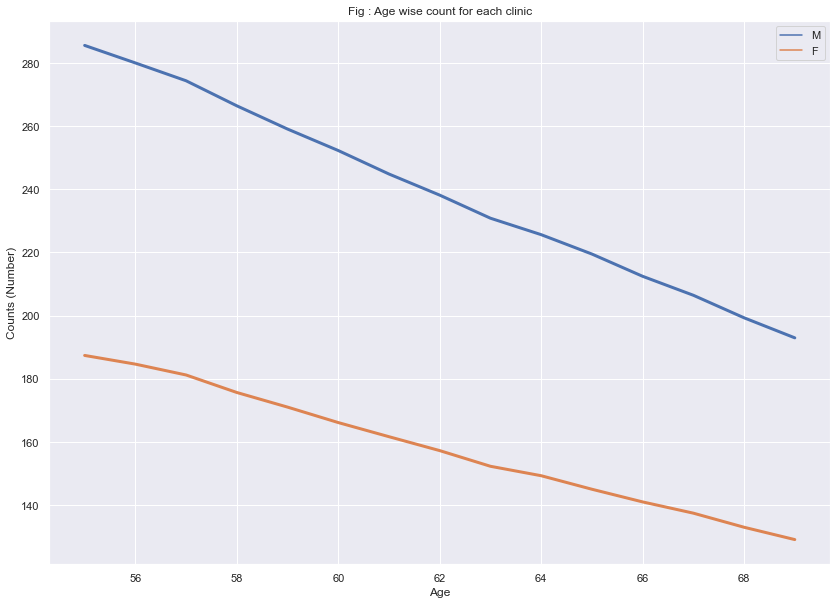

In [85]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcensus5569, x ='Age', y = 'Projectedcol',
                  hue='Gender', lw=3) # Draw the plot
plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot


In [86]:
# Next step use seperate populations for M and F, see the total count from dfcensus5569, 
#see above for the average in the sample and do a hypothesis testing for the expected total

# Hypothesis Testing

In [87]:
#Statistics Library
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Sample 1: Male population between 60-69



In [88]:
# Mean =209

In [89]:
# create 90% confidence interval, use the scipy.stats
st.t.interval(alpha=0.90, 
              df=1, # Dataframe length
              loc=209, # mean average for male population 60-69
              scale = 4
              )

(183.74499394079623, 234.25500605920374)

In [90]:
# create 95% confidence interval, use the scipy.stats
st.t.interval(alpha=0.95, 
              df=1, # Dataframe length
              loc=209, # mean average for male population 60-69
              scale = 4
              )

(158.1751810542716, 259.8248189457284)

In [91]:
# As seen above at 90% CI the colonoscopies vary between 183 to 234.
# Now, taking the whole population from 55-70, we see in the chart male population max is 275. Doing a T-Test for one population

In [92]:
#Get the projected values from the populations for Male
X=dfcensus5569['Projectedcol'].loc[(dfcensus5569['Gender']=='M')]




In [93]:
#H0 : u = 275
#H1 : u < 275
#stats.ttest_1samp(X,mu of H0)
st.ttest_1samp(X,275)

Ttest_1sampResult(statistic=-4.631946392946002, pvalue=0.00038816017205040325)

In [94]:
# Hypothesis is rejected since p value is less than 0.05

In [95]:
#H1 : u > 230
st.t.sf(-6.195641472339939, 8)

0.9998696682756691

In [96]:
# T Test shows the max number of colonoscopies for M is greater than 230

<Figure size 1008x720 with 0 Axes>

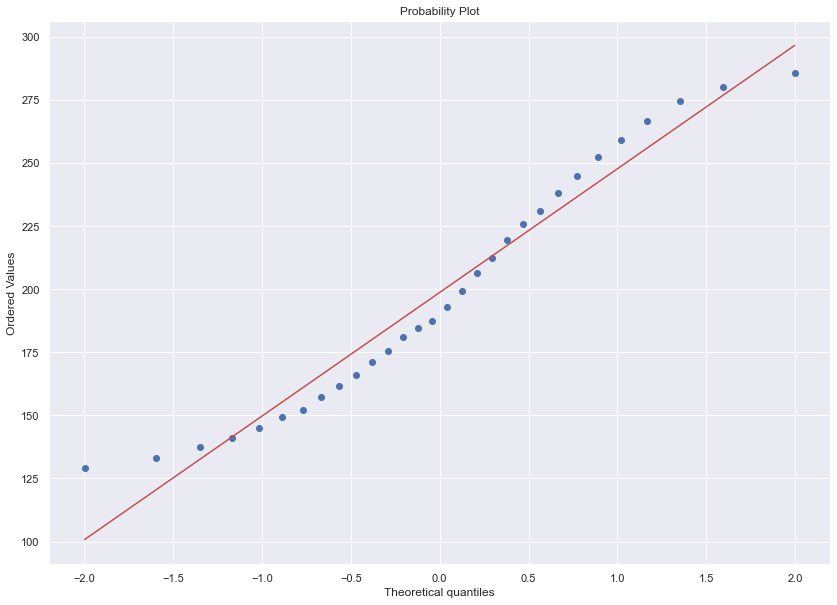

<Figure size 1008x720 with 0 Axes>

In [97]:
#Normality plot. Our variable is "charges"

st.probplot(dfcensus5569.Projectedcol, plot=plt)
plt.figure()

In [98]:
dfcensus5569.head()

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083


In [99]:
#Shapiro wilk test for Male

st.shapiro(dfcensus5569.Projectedcol[dfcensus5569.Gender == "M"])

ShapiroResult(statistic=0.9598639011383057, pvalue=0.6900299191474915)

In [100]:
#Shapiro wilk test for Female

st.shapiro(dfcensus5569.Projectedcol[dfcensus5569.Gender == "F"])

ShapiroResult(statistic=0.9548131227493286, pvalue=0.6031501889228821)

In [101]:
#ONE-WAY ANOVA
#H0 : Variances of Mean value for the genders are same
#H1 : Variances of Mean value for the genders are different

model = ols('Projectedcol~Gender', data = dfcensus5569).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

            df        sum_sq       mean_sq          F        PR(>F)
Gender     1.0  49256.213300  49256.213300  78.045392  1.378246e-09
Residual  28.0  17671.433657    631.122631        NaN           NaN


In [102]:
from scipy.stats import mannwhitneyu

#H0 : Median values for the genders are the same.
#H1 : Median values for the genders are differnt.



# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(dfcensus5569['Projectedcol'].sort_values(), dfcensus5569['Projectedcol'].sort_values())
results

MannwhitneyuResult(statistic=450.0, pvalue=1.0)

# Sample 2: Female population between 60-69


In [103]:
#mean = 136

# create 90% confidence interval, use the scipy.stats
st.t.interval(alpha=0.90, 
              df=1, # Dataframe length
              loc=136, # mean average for male population 60-69
              scale = 4
              )

(110.74499394079623, 161.25500605920374)

In [104]:
#Get the projected values from the populations for Female
X=dfcensus5569['Projectedcol'].loc[(dfcensus5569['Gender']=='F')]

In [105]:
#H0 : u = 161
#H1 : u > 110
#stats.ttest_1samp(X,mu of H0)
st.ttest_1samp(X,161)

Ttest_1sampResult(statistic=-0.5763906915478207, pvalue=0.5735018389945836)

In [106]:
#H1 : u > 110
st.t.sf(-2.8640589660047233, 8)

0.9894900518884822

In [107]:
#ANOVA TWO WAYS
#H0 : Variances of Mean value for the age and gender are same
#H1 : Variances of Mean value for the age and gender are different
  
model2 = ols('Projectedcol~Age+Gender', data = dfcensus5569).fit()
aov2 = sm.stats.anova_lm(model2, type=2)
print(aov2)

            df        sum_sq       mean_sq            F        PR(>F)
Gender     1.0  49256.213300  49256.213300  1584.653699  1.625153e-25
Age        1.0  16832.185461  16832.185461   541.519195  2.120368e-19
Residual  27.0    839.248196     31.083267          NaN           NaN


# Dataset for Machine Learning model time series

In [108]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,3,1,2014,Jan
1,1315,69,2014-01-03,M,9,3,1,2014,Jan
2,1316,68,2014-01-03,F,9,3,1,2014,Jan
3,1319,68,2014-01-03,F,1,3,1,2014,Jan
4,1320,67,2014-01-03,M,1,3,1,2014,Jan
...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,3,12,2022,Dec
33606,38926,65,2022-09-29,F,15,29,9,2022,Sep
33607,38953,71,2022-12-04,F,16,4,12,2022,Dec
33608,38971,66,2022-12-02,M,8,2,12,2022,Dec


In [109]:
dfcolraw.loc[(dfcolraw['Age']>=55)&(dfcolraw['Age']<70)].groupby(['Age','Gender','proceduredate','month','year'])['ID'].agg(["count"]).reset_index()


#dfcensus5569=dfcensusall.loc[(dfcensusall['Age']>=55) & (dfcensusall['Age']<70)]


,Age,Gender,proceduredate,month,year,count
0,57,F,2015-04-29,4,2015,1
1,58,M,2018-02-07,2,2018,1
2,59,F,2017-03-02,3,2017,1
3,59,F,2018-09-18,9,2018,1
4,59,M,2018-07-09,7,2018,1
...,...,...,...,...,...,...
18226,69,M,2022-12-19,12,2022,2
18227,69,M,2022-12-20,12,2022,1
18228,69,M,2022-12-21,12,2022,2
18229,69,M,2022-12-22,12,2022,2


In [110]:
dfcolraw['day']=1
#dfcolraw['firstdate']=dfcolraw['firstdate'].astype(Date)
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             33610 non-null  int64         
 1   Age            33610 non-null  int64         
 2   proceduredate  33610 non-null  datetime64[ns]
 3   Gender         33610 non-null  object        
 4   CLINICID       33610 non-null  int64         
 5   day            33610 non-null  int64         
 6   month          33610 non-null  int64         
 7   year           33610 non-null  int64         
 8   Monthname      33610 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.3+ MB


In [111]:
#dfcolraw['firstdate']=pd.to_datetime(dfcolraw[["year", "month", "day"]], format='%d%b%Y')

In [112]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,1,1,2014,Jan
1,1315,69,2014-01-03,M,9,1,1,2014,Jan
2,1316,68,2014-01-03,F,9,1,1,2014,Jan
3,1319,68,2014-01-03,F,1,1,1,2014,Jan
4,1320,67,2014-01-03,M,1,1,1,2014,Jan
...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,1,12,2022,Dec
33606,38926,65,2022-09-29,F,15,1,9,2022,Sep
33607,38953,71,2022-12-04,F,16,1,12,2022,Dec
33608,38971,66,2022-12-02,M,8,1,12,2022,Dec


In [113]:
dfcolraw['Quarterdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='Q').to_timestamp()
dfcolraw['Weekdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='W').to_timestamp()
dfcolraw['Monthdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='M').to_timestamp()

dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1314,68,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
1,1315,69,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
2,1316,68,2014-01-03,F,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
3,1319,68,2014-01-03,F,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
4,1320,67,2014-01-03,M,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33606,38926,65,2022-09-29,F,15,1,9,2022,Sep,2022-07-01,2022-09-26,2022-09-01
33607,38953,71,2022-12-04,F,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33608,38971,66,2022-12-02,M,8,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01


In [114]:
dfcolraw.groupby(['Monthdate'])['ID'].count()

Monthdate
2014-01-01    182
2014-02-01    152
2014-03-01    183
2014-04-01    218
2014-05-01    277
             ... 
2022-08-01    423
2022-09-01    465
2022-10-01    489
2022-11-01    514
2022-12-01    344
Name: ID, Length: 96, dtype: int64

In [115]:
#Changethe Date field to pandas datetime
#dfcolraw['proceduredate'] = pd.to_datetime(dfcolraw['proceduredate'], format='%d/%m/%Y')

df_timeseries = dfcolraw.groupby(['Quarterdate','Age','Gender'])['ID'].count().reset_index()
#dfcolraw.groupby(['Age','proceduredate'])['ID'].count()
df_timeseries

,Quarterdate,Age,Gender,ID
0,2014-01-01,64,F,1
1,2014-01-01,64,M,1
2,2014-01-01,65,F,1
3,2014-01-01,65,M,3
4,2014-01-01,66,F,21
...,...,...,...,...
983,2022-10-01,78,F,1
984,2022-10-01,78,M,3
985,2022-10-01,79,F,2
986,2022-10-01,79,M,3


In [116]:
dfcensus5560=dfcensus5569[['Age','Gender','Projectedcol']].loc[(dfcensus5569['Age']>=55) & (dfcensus5569['Age']<61)]

In [117]:
dfcensus5560

,Age,Gender,Projectedcol
0,55,M,285.560500
1,56,M,280.012500
2,57,M,274.363167
3,58,M,266.435417
4,59,M,259.076083
5,60,M,252.274083
15,55,F,187.401150
16,56,F,184.649033
17,57,F,181.212700
18,58,F,175.669833


In [118]:
df_timeseries = df_timeseries.set_index('Quarterdate')
df_timeseries.head(20)

,Age,Gender,ID
Quarterdate,,,
2014-01-01,64,F,1
2014-01-01,64,M,1
2014-01-01,65,F,1
2014-01-01,65,M,3
2014-01-01,66,F,21
2014-01-01,66,M,26
2014-01-01,67,F,46
2014-01-01,67,M,80
2014-01-01,68,F,50


In [119]:
print(f'Number of rows with missing values: {df_timeseries.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [120]:
df_timeseriesQD = dfcolraw.groupby(['Quarterdate'])['ID'].count()
#df_timeseriesQD=df_timeseriesQD.set_index(Quarterdate)
df_timeseriesQD=pd.DataFrame(df_timeseriesQD)
df_timeseriesQD.head(2)

,ID
Quarterdate,
2014-01-01,517
2014-04-01,797


In [121]:
train = df_timeseriesQD[(df_timeseriesQD.index < pd.to_datetime("2021-01-01", format='%Y-%m-%d')) ]
test = df_timeseriesQD[df_timeseriesQD.index >= pd.to_datetime("2021-01-01", format='%Y-%m-%d')]
# Split data into train-test
# ==============================================================================
steps = 36
#train = df_timeseriesQD[:-steps]
#test  = df_timeseriesQD[-steps:]
print(train.shape)
print(test.shape)
train

(24, 1)
(8, 1)


,ID
Quarterdate,
2014-01-01,517
2014-04-01,797
2014-07-01,1010
2014-10-01,1028
2015-01-01,1084
2015-04-01,1020
2015-07-01,993
2015-10-01,917
2016-01-01,973


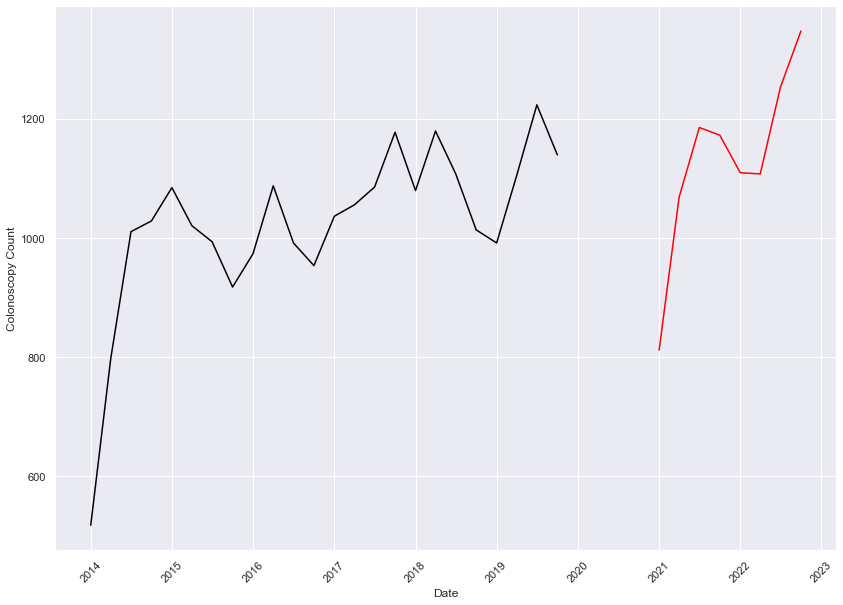

In [122]:
plt.plot(train[['ID']], color = "black", label = 'Training')
plt.plot(test[['ID']], color = "red", label = 'Testing')
plt.ylabel('Colonoscopy Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title="Train/Test split for Sentiment"
plt.show()

In [123]:
# The above graph shows there is no seasonality and trend, checking for stationary next using ADF Test

In [124]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test for stationary where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.
result = adfuller(train.ID.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.267129886324942
p-value: 6.40271200292048e-06
Critial Values:
   1%, -3.7529275211638033
Critial Values:
   5%, -2.998499866852963
Critial Values:
   10%, -2.6389669754253307


In [125]:
# ADF test shows p-value less than 0.05 hene the hypothesis is rejected and stationary is confirmed

In [126]:
#dfri=train.reset_index()
train

,ID
Quarterdate,
2014-01-01,517
2014-04-01,797
2014-07-01,1010
2014-10-01,1028
2015-01-01,1084
2015-04-01,1020
2015-07-01,993
2015-10-01,917
2016-01-01,973


C:\Users\raku4\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\raku4\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


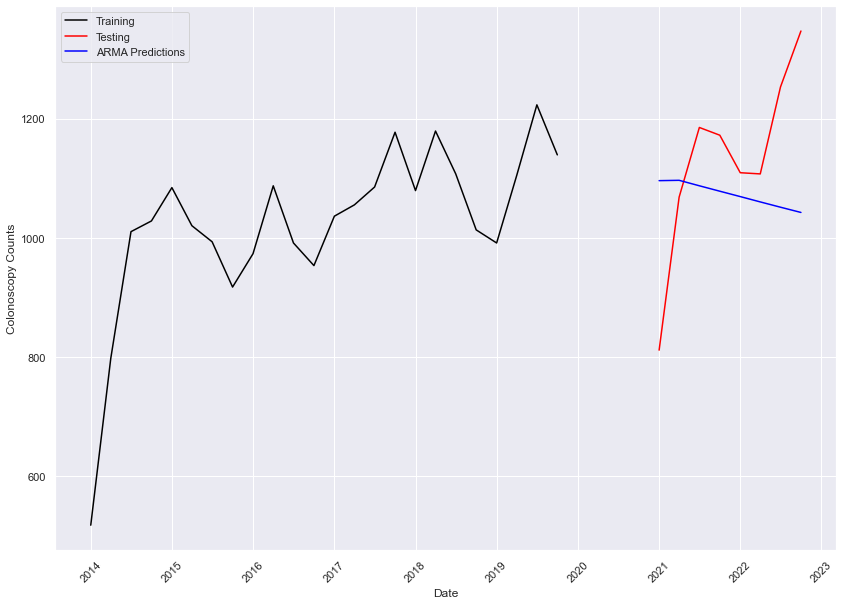

In [127]:
#ARMA modelsince there is no seasonality or trend
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['ID']

ARMAmodel = SARIMAX(y, order = (1, 0, 2))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Colonoscopy Counts')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title="Train test and Predictions for Colonoscopy Counts"
plt.plot(y_pred_outARMA, color='blue', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [128]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [129]:
df_timeseries

,Age,Gender,ID
Quarterdate,,,
2014-01-01,64,F,1
2014-01-01,64,M,1
2014-01-01,65,F,1
2014-01-01,65,M,3
2014-01-01,66,F,21
...,...,...,...
2022-10-01,78,F,1
2022-10-01,78,M,3
2022-10-01,79,F,2


In [130]:
#df_timeseriesQE=df_timeseries.copy()
#df_timeseriesQE=pd.DataFrame(df_timeseriesQE).reset_index()
#df_timeseriesQE

In [131]:
#df_timeseriesQE=df_timeseriesQE.set_index(pd.to_datetime(df_timeseriesQE['Quarterdate']))
#df_timeseriesQE

In [132]:

#train = df_timeseries[(df_timeseries.index < pd.to_datetime("2022-01-01", format='%Y-%m-%d')) ]
#test = df_timeseries[df_timeseries.index >= pd.to_datetime("2022-01-01", format='%Y-%m-%d')]

#print(train.shape)
#print(test.shape)
#train

In [133]:
#print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
#print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

In [134]:
#test[['Age','Gender']]

In [135]:
#train['Gender'] = train['Gender'].map(gendermap)
#test.info()

In [136]:
#test['Gender'] = test['Gender'].map(gendermap)
#train

In [137]:
df_timeseriesQD = dfcolraw.groupby(['Quarterdate'])['ID'].count()
df_timeseriesQD=pd.DataFrame(df_timeseriesQD).reset_index()
df_timeseriesQD=df_timeseriesQD.set_index(pd.to_datetime(df_timeseriesQD['Quarterdate']))
#df_timeseriesQD=df_timeseriesQD[['ID']]
df_timeseriesQD = df_timeseriesQD.asfreq('Q','ffill')

df_timeseriesQD.head(2)

,Quarterdate,ID
Quarterdate,,
2014-03-31,2014-01-01,517
2014-06-30,2014-04-01,797


In [138]:
dfcolraw.groupby(['Weekdate'])['ID'].count()

Weekdate
2013-12-30     11
2014-01-06     46
2014-01-13     53
2014-01-20     33
2014-01-27     39
             ... 
2022-11-28    123
2022-12-05    102
2022-12-12     94
2022-12-19     93
2022-12-26      5
Name: ID, Length: 416, dtype: int64

In [139]:
df_timeseriesWD = dfcolraw.groupby(['Weekdate'])['ID'].count()
df_timeseriesWD=pd.DataFrame(df_timeseriesWD).reset_index()
df_timeseriesWD=df_timeseriesWD.set_index(pd.to_datetime(df_timeseriesWD['Weekdate']))

df_timeseriesWD = df_timeseriesWD.asfreq('W','ffill')
df_timeseriesWD.head(2)

,Weekdate,ID
Weekdate,,
2014-01-05,2013-12-30,11
2014-01-12,2014-01-06,46


In [140]:
train = df_timeseriesQD[(df_timeseriesQD.index < pd.to_datetime("2021-01-01", format='%Y-%m-%d')) ]
test = df_timeseriesQD[df_timeseriesQD.index >= pd.to_datetime("2021-01-01", format='%Y-%m-%d')]

print(train.shape)
print(test.shape)
train

(28, 2)
(7, 2)


,Quarterdate,ID
Quarterdate,,
2014-03-31,2014-01-01,517
2014-06-30,2014-04-01,797
2014-09-30,2014-07-01,1010
2014-12-31,2014-10-01,1028
2015-03-31,2015-01-01,1084
2015-06-30,2015-04-01,1020
2015-09-30,2015-07-01,993
2015-12-31,2015-10-01,917
2016-03-31,2016-01-01,973


In [141]:
# Create and train forecaster for Quarter
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 2
                )

forecaster.fit(y=train['ID'])
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=10)
predictions.head(50)


2021-03-31    1139.38
2021-06-30    1139.38
2021-09-30    1139.38
2021-12-31    1139.38
2022-03-31    1139.38
2022-06-30    1139.38
2022-09-30    1139.38
2022-12-31    1139.38
2023-03-31    1139.38
2023-06-30    1139.38
Freq: Q-DEC, Name: pred, dtype: float64

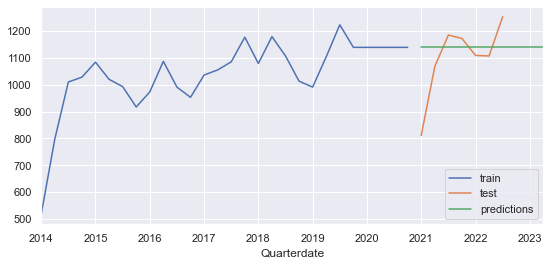

In [142]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
train['ID'].plot(ax=ax, label='train')
test['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [143]:
# Create and train forecaster for week
# ==============================================================================
#forecaster = ForecasterAutoreg(
#                regressor = RandomForestRegressor(random_state=123),
#                lags = 2
#                )
#
#forecaster.fit(y=trainw['ID'])
#forecaster
## Predictions
## ==============================================================================
#predictions = forecaster.predict(steps=132)
#predictions.head(50)


In [144]:
trainw = df_timeseriesWD[(df_timeseriesWD.index < pd.to_datetime("2020-01-01", format='%Y-%m-%d')) ]
testw = df_timeseriesWD[df_timeseriesWD.index >= pd.to_datetime("2020-01-01", format='%Y-%m-%d')]

print(trainw.shape)
print(testw.shape)
trainw

(313, 2)
(156, 2)


,Weekdate,ID
Weekdate,,
2014-01-05,2013-12-30,11
2014-01-12,2014-01-06,46
2014-01-19,2014-01-13,53
2014-01-26,2014-01-20,33
2014-02-02,2014-01-27,39
...,...,...
2019-12-01,2019-11-25,127
2019-12-08,2019-12-02,93
2019-12-15,2019-12-09,113


In [145]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 2
                )

forecaster.fit(y=trainw['ID'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2] 
Transformer for y: None 
Transformer for exog: None 
Window size: 2 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2014-01-05 00:00:00'), Timestamp('2019-12-29 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-08-26 15:14:34 
Last fit date: 2023-08-26 15:14:35 
Skforecast version: 0.7.0 
Python version: 3.9.12 
Forecaster id: None 

In [146]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=156)
predictions.tail(10)

2022-10-23    80.178667
2022-10-30    72.215833
2022-11-06    86.833333
2022-11-13    84.944848
2022-11-20    94.753333
2022-11-27    90.011667
2022-12-04    80.848000
2022-12-11    85.260000
2022-12-18    80.350000
2022-12-25    80.178667
Freq: W-SUN, Name: pred, dtype: float64

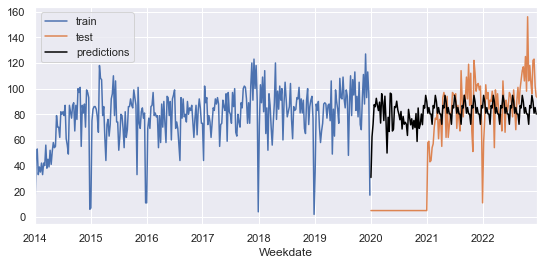

In [147]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
trainw['ID'].plot(ax=ax, label='train')
testw['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [148]:
testw.shape

(156, 2)

In [149]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testw['ID'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 2170.3660255076175


In [150]:
train.shape

(28, 2)

In [151]:
# Hyperparameter Grid search
# ==============================================================================
steps = 36
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [40,50]
  
# Regressor's hyperparameters
param_grid = {'n_estimators': [500,1000],
              'max_depth': [100,200]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = trainw['ID'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(trainw)*0.8),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 8.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:13<00:00, 36.74s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40] 
  Parameters: {'max_depth': 100, 'n_estimators': 1000}
  Backtesting metric: 477.7993712063492



In [152]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 1000}",477.799371,100,1000
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 1000}",477.799371,200,1000
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 500}",480.610256,100,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 500}",480.610256,200,500
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 500}",482.023334,100,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 500}",482.023334,200,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 1000}",484.509424,100,1000
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 1000}",484.509424,200,1000


In [153]:
# Predictors importance
# ==============================================================================
forecaster.get_feature_importance()

,feature,importance
0,lag_1,0.110127
1,lag_2,0.065852
2,lag_3,0.014871
3,lag_4,0.100507
4,lag_5,0.021167
5,lag_6,0.017332
6,lag_7,0.015856
7,lag_8,0.039659
8,lag_9,0.018836
9,lag_10,0.022349


In [154]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
    
                    regressor = make_pipeline(StandardScaler(),  LinearRegression()),
                    #regressor = LinearRegression(),
                    lags = 15
             )

forecaster.fit(y=trainw['ID'])

# Prediction intervals
# ==============================================================================
predictions = forecaster.predict_interval(
                    steps    = 156,
                    interval = [10, 70],
                    n_boot   = 100
              )

predictions.shape

(156, 3)

Test error (mse): 2324.9118162954287


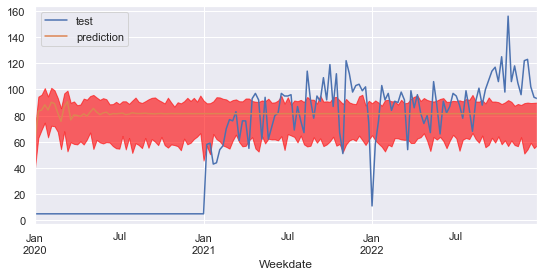

In [155]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testw['ID'],
                y_pred = predictions.iloc[:, 0]
            )

print(f"Test error (mse): {error_mse}")

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
testw['ID'].plot(ax=ax, label='test')
predictions['pred'].plot(ax=ax, label='prediction')
ax.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color = 'red',
    alpha = 0.6
)
ax.legend();

In [156]:
# Hyperparameter Grid search
# ==============================================================================
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput

forecaster = ForecasterAutoreg(
                    regressor = make_pipeline(StandardScaler(), Lasso(random_state=123)),
                    
                    lags      = 8 # This value will be replaced in the grid search
             )

# To access parameters of a scikitlearn pipeline the pattern:
# <name of the step>__<name of the parameter>.
param_grid = {'lasso__alpha': np.logspace(-5, 5, 10)}
lags_grid = [20, 30, 40,60]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = trainw['ID'],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 80,
                        refit       = True,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(trainw)*0.2),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
                )

Number of models compared: 40.


loop lags_grid: 100%|███████████████████████████████████████| 4/4 [00:02<00:00,  1.48it/s]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 
  Parameters: {'lasso__alpha': 100000.0}
  Backtesting metric: 360.6238965525082



In [157]:
# Grid Search results
# ==============================================================================
results_grid.head()

,lags,params,mean_squared_error,lasso__alpha
19,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 100000.0},360.623897,100000.000000
16,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 46.41588833612782},360.623897,46.415888
17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 599.4842503189421},360.623897,599.484250
18,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 7742.636826811277},360.623897,7742.636827
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 46.41588833612782},361.020985,46.415888


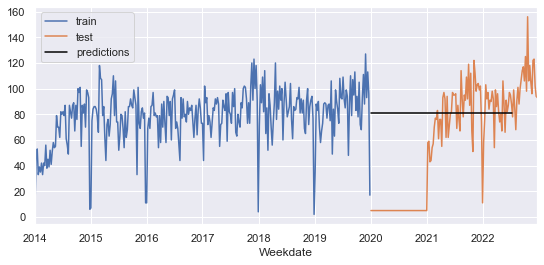

In [158]:
# Predictions
# ==============================================================================
predictions = forecaster.predict( steps    = 132)

# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
trainw['ID'].plot(ax=ax, label='train')
testw['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [159]:
dfcensus5569

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


In [160]:
dfcensus5569['Projectedcol'].sum()

5960.201583333333

In [161]:
dfcensus_ml=dfcensus5569.loc[(dfcensus5569['Age']>=55) & (dfcensus5569['Age']<71)]
dfcensus_ml

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


In [162]:
df_timeseriesml =dflspivotlt69[['Age','Gender','mean']].reset_index(drop=True)
dflspivotlt69

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,F,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,F,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,M,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,F,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000
28,M,62,216.0,141.0,137.0,313.0,137.0,150.0,182.333333
5,F,63,256.0,91.0,196.0,152.0,128.0,178.0,166.833333
29,M,63,352.0,144.0,263.0,191.0,170.0,208.0,221.333333
6,F,64,126.0,83.0,135.0,121.0,152.0,160.0,129.500000
30,M,64,198.0,119.0,232.0,181.0,278.0,230.0,206.333333


In [163]:
dfml = pd.merge(dfcensus_ml, df_timeseriesml, 'left',on=["Age", "Gender"])
dfml['Gender'] = dfml['Gender'].map(gendermap)

dfml

,Age,Gender,meanE,Projectedcol,mean
0,55,1,30059.000000,285.560500,NaN
1,56,1,29475.000000,280.012500,NaN
2,57,1,28880.333333,274.363167,NaN
3,58,1,28045.833333,266.435417,NaN
4,59,1,27271.166667,259.076083,NaN
5,60,1,26555.166667,252.274083,257.500000
6,61,1,25772.500000,244.838750,154.166667
7,62,1,25068.833333,238.153917,182.333333
8,63,1,24299.833333,230.848417,221.333333
9,64,1,23751.500000,225.639250,206.333333


In [164]:
dfml['mean'] = dfml['mean'].fillna(dfml['Projectedcol'])

In [165]:
dfml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           30 non-null     int64  
 1   Gender        30 non-null     int64  
 2   meanE         30 non-null     float64
 3   Projectedcol  30 non-null     float64
 4   mean          30 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.4 KB


In [166]:
dfcolpdavg=dfcolraw.groupby(['Age','Gender','CLINICID','month','year'])['ID'].count()

#dfcolpdavg=dfcolraw.groupby(['Age','proceduredate'])['ID'].count()
dfcolpdavg=pd.DataFrame(dfcolpdavg)
dfcolpdavg.reset_index(inplace=True)
dfcolpdavg['Gender'] = dfcolpdavg['Gender'].map(gendermap)

dfcolpdavg

,Age,Gender,CLINICID,month,year,ID
0,53,1,9,7,2018,1
1,57,2,24,4,2015,1
2,58,1,9,2,2018,1
3,59,2,2,3,2017,1
4,59,2,18,9,2018,1
...,...,...,...,...,...,...
17180,79,1,9,7,2022,1
17181,79,1,16,11,2022,1
17182,79,1,17,1,2022,1
17183,79,1,21,10,2022,1


In [167]:
#X = dfcolpdavg[['Age','Gender','meanE','Projectedcol']].values
dfcolpdavg

,Age,Gender,CLINICID,month,year,ID
0,53,1,9,7,2018,1
1,57,2,24,4,2015,1
2,58,1,9,2,2018,1
3,59,2,2,3,2017,1
4,59,2,18,9,2018,1
...,...,...,...,...,...,...
17180,79,1,9,7,2022,1
17181,79,1,16,11,2022,1
17182,79,1,17,1,2022,1
17183,79,1,21,10,2022,1


In [168]:
#Import Libraries for ML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [169]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
dfml['mean_l1'] = dfml ['mean'].shift(1)
dfml['mean_l2'] = dfml ['mean'].shift(2)
dfml['mean_l3'] = dfml ['mean'].shift(3)
dfml['mean_l4'] = dfml ['mean'].shift(4)
dfml['mean_l5'] = dfml ['mean'].shift(5)

# Display the first 10 records


dfml.bfill(axis = 0,inplace=True)

In [170]:
dfml

,Age,Gender,meanE,Projectedcol,mean,mean_l1,mean_l2,mean_l3,mean_l4,mean_l5
0,55,1,30059.000000,285.560500,285.560500,285.560500,285.560500,285.560500,285.560500,285.560500
1,56,1,29475.000000,280.012500,280.012500,285.560500,285.560500,285.560500,285.560500,285.560500
2,57,1,28880.333333,274.363167,274.363167,280.012500,285.560500,285.560500,285.560500,285.560500
3,58,1,28045.833333,266.435417,266.435417,274.363167,280.012500,285.560500,285.560500,285.560500
4,59,1,27271.166667,259.076083,259.076083,266.435417,274.363167,280.012500,285.560500,285.560500
5,60,1,26555.166667,252.274083,257.500000,259.076083,266.435417,274.363167,280.012500,285.560500
6,61,1,25772.500000,244.838750,154.166667,257.500000,259.076083,266.435417,274.363167,280.012500
7,62,1,25068.833333,238.153917,182.333333,154.166667,257.500000,259.076083,266.435417,274.363167
8,63,1,24299.833333,230.848417,221.333333,182.333333,154.166667,257.500000,259.076083,266.435417
9,64,1,23751.500000,225.639250,206.333333,221.333333,182.333333,154.166667,257.500000,259.076083


<AxesSubplot:>

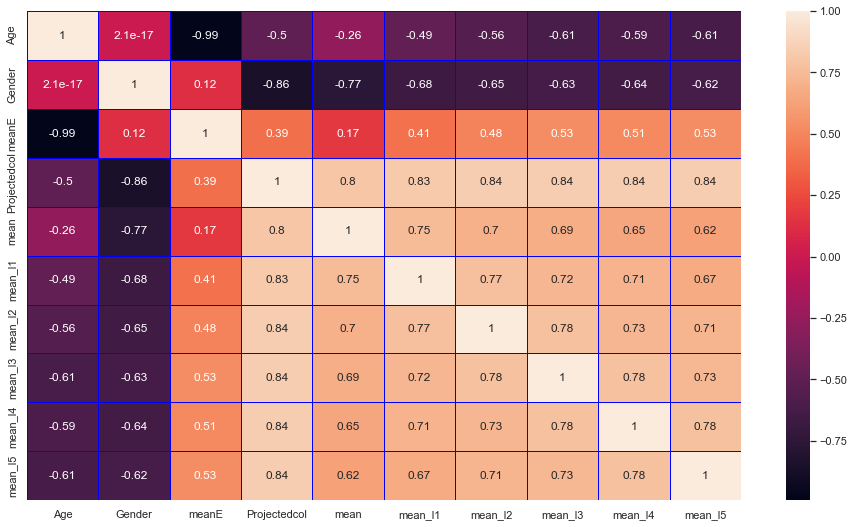

In [171]:
correlation = dfml.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

Training data Accuracy :  0.5859085542147588
Testing data  Accuracy :  -34.177945477173495


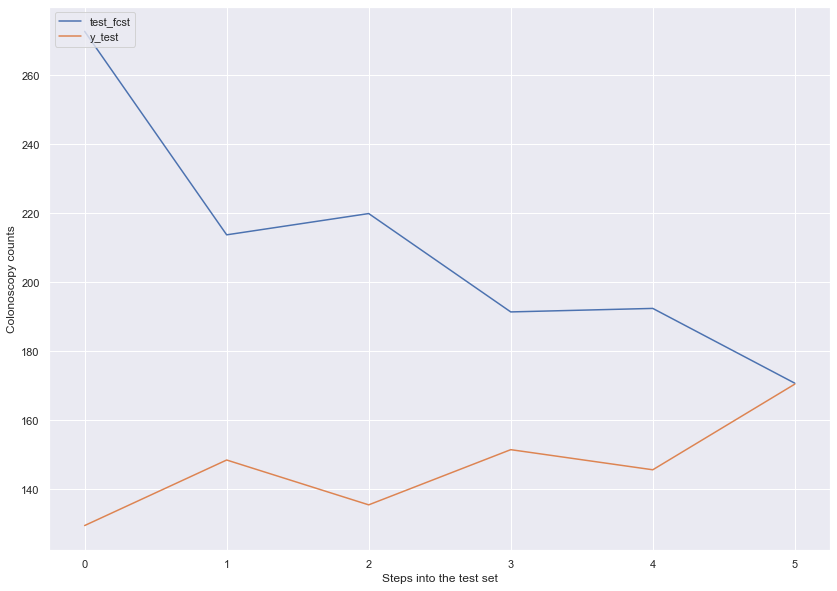

In [172]:


# Create X and y objects
X = dfml[['Projectedcol','mean_l1']].values
y = dfml['mean'].values

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345, shuffle = False)


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [173]:
X_train

array([[ 1.76213132,  1.3871431 ],
       [ 1.62636391,  1.3871431 ],
       [ 1.48811674,  1.27786135],
       [ 1.29411349,  1.1665836 ],
       [ 1.1140202 ,  1.01042672],
       [ 0.94756565,  0.86546624],
       [ 0.76561253,  0.83442133],
       [ 0.60202521, -1.20098726],
       [ 0.42324929, -0.64617427],
       [ 0.29577362,  0.12202833],
       [ 0.14567005, -0.17343421],
       [-0.0267902 ,  0.26975959],
       [-0.17379406, -0.18000005],
       [-0.34838536,  0.24677917],
       [-0.5037197 ,  0.25991084],
       [-0.63996674,  1.2710493 ],
       [-0.70731493, -0.54635094],
       [-0.79140686, -0.60056076],
       [-0.92704864, -0.66824795],
       [-1.0402742 , -0.77742858],
       [-1.16011765, -0.86856597],
       [-1.26961132, -0.43935049],
       [-1.37738832, -2.37955448],
       [-1.49882404, -1.61791772]])

# Cross Validation

# GRID SEARCH CV

In [174]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [175]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

0.6044480728204839
0.32812394521893823


0.6044480728204839
0.32812394521893823


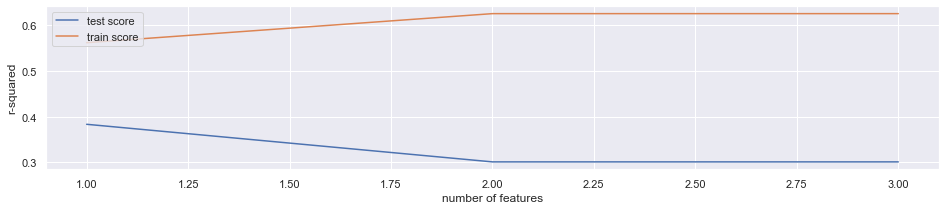

In [176]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# K Neighbours Regressor

In [177]:
from sklearn.neighbors import KNeighborsRegressor

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)





neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Declare and initialise kNN classifier with k neighbors
    kNR = KNeighborsRegressor(n_neighbors = k)
    
    #Call the method fit to train the model
    kNR.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i]=kNR.score(X_train,y_train)
    
    #Compute accuracy on the training set
    test_accuracy[i]=kNR.score(X_test,y_test)
    
    
knr_train_acc=train_accuracy.mean()
knr_test_acc=test_accuracy.mean()
print(knr_train_acc)
print(knr_test_acc)

0.39185429325645343
-7.331460313339352


# Decision Tree Regressor

In [178]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor



tree = DecisionTreeRegressor(max_depth = 4)
tree.fit(X_train, y_train)

# Return a copy of the array collapsed into one dimension.
sort_idx = X.flatten().argsort()
len(sort_idx)
#lin_regplot(X[sort_idx], y[sort_idx], tree)
# plt.xlabel('% lower status of the population [LSTAT]')
# plt.ylabel('Price in $1000\'s [MEDV]')
# # plt.savefig('./figures/tree_regression.png', dpi = 300)
# plt.show()

60

In [179]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

DT_R2_Train=r2_score(y_train, y_train_pred)
DT_R2_Test=r2_score(y_test, y_test_pred)

R^2 train: 0.982, test: -5.703


In [180]:
#print("Train Prediction : ",y_train_pred)
#print("Test Prediction : ",y_test_pred)
    #Compute accuracy on the training set
train_accuracy[i]=tree.score(X_train,y_train)
    
    #Compute accuracy on the training set
test_accuracy[i]=tree.score(X_test,y_test)

DT_Train_acc=train_accuracy.mean()
DT_Test_acc=test_accuracy.mean()
print(DT_Train_acc)
print(DT_Test_acc)


0.43829948796222346
-7.014926812129467


# GRID CV

In [181]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [182]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,1,1,0.999797,-0.123732
1,5,2,1.000000,-0.598417
2,4,3,1.000000,-0.549889
3,3,4,1.000000,-0.515629
4,2,5,1.000000,-0.505252


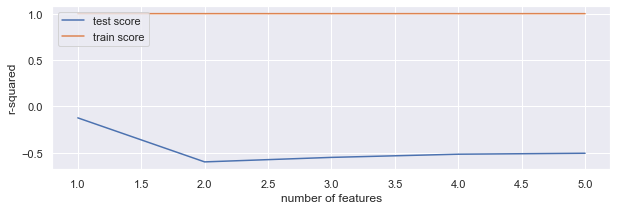

In [183]:
# plotting cv results
plt.figure(figsize=(10,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [184]:
#Random Forest Regressor

In [185]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor







# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)



RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=1)

In [186]:
# All the ML algorthims shows very small accruarcy.

In [187]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1314,68,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
1,1315,69,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
2,1316,68,2014-01-03,F,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
3,1319,68,2014-01-03,F,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
4,1320,67,2014-01-03,M,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33606,38926,65,2022-09-29,F,15,1,9,2022,Sep,2022-07-01,2022-09-26,2022-09-01
33607,38953,71,2022-12-04,F,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33608,38971,66,2022-12-02,M,8,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01


In [188]:
#dfml = pd.merge(dfcensus_ml, df_timeseriesml, 'left',on=["Age", "Gender"])
#dfml['Gender'] = dfml['Gender'].map(gendermap)

dfcensus_ml.describe()
dfcensus_ml

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


In [189]:
#dfcensus_ml.groupby(['year'])['ID'].count()


In [190]:
#Yearly average above is 188. Daily average is 188/52(weeks)=3.6 (4). Will add this to the weekly numbers from the colonoscopy records

In [191]:
df_timeseriesWD

,Weekdate,ID
Weekdate,,
2014-01-05,2013-12-30,11
2014-01-12,2014-01-06,46
2014-01-19,2014-01-13,53
2014-01-26,2014-01-20,33
2014-02-02,2014-01-27,39
...,...,...
2022-11-27,2022-11-21,122
2022-12-04,2022-11-28,123
2022-12-11,2022-12-05,102


In [192]:
df_timeseriesWD['ID']=df_timeseriesWD['ID']+4

In [193]:
df_timeseriesWD.reset_index(drop=True,inplace=True)
df_timeseriesWD.rename(columns = {'ID':'Counts'}, inplace = True)
df_timeseriesWD

,Weekdate,Counts
0,2013-12-30,15
1,2014-01-06,50
2,2014-01-13,57
3,2014-01-20,37
4,2014-01-27,43
...,...,...
464,2022-11-21,126
465,2022-11-28,127
466,2022-12-05,106
467,2022-12-12,98


In [194]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
df_timeseriesWD['Counts_l1'] = df_timeseriesWD ['Counts'].shift(1)
df_timeseriesWD['Counts_l2'] = df_timeseriesWD ['Counts'].shift(2)
df_timeseriesWD['Counts_l3'] = df_timeseriesWD ['Counts'].shift(3)
df_timeseriesWD['Counts_l4'] = df_timeseriesWD ['Counts'].shift(4)
df_timeseriesWD['Counts_l5'] = df_timeseriesWD ['Counts'].shift(5)
df_timeseriesWD

,Weekdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2013-12-30,15,NaN,NaN,NaN,NaN,NaN
1,2014-01-06,50,15.0,NaN,NaN,NaN,NaN
2,2014-01-13,57,50.0,15.0,NaN,NaN,NaN
3,2014-01-20,37,57.0,50.0,15.0,NaN,NaN
4,2014-01-27,43,37.0,57.0,50.0,15.0,NaN
...,...,...,...,...,...,...,...
464,2022-11-21,126,100.0,109.0,122.0,110.0,160.0
465,2022-11-28,127,126.0,100.0,109.0,122.0,110.0
466,2022-12-05,106,127.0,126.0,100.0,109.0,122.0
467,2022-12-12,98,106.0,127.0,126.0,100.0,109.0


In [195]:
df_timeseriesWD.bfill(axis = 0,inplace=True)
df_timeseriesWD

,Weekdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2013-12-30,15,15.0,15.0,15.0,15.0,15.0
1,2014-01-06,50,15.0,15.0,15.0,15.0,15.0
2,2014-01-13,57,50.0,15.0,15.0,15.0,15.0
3,2014-01-20,37,57.0,50.0,15.0,15.0,15.0
4,2014-01-27,43,37.0,57.0,50.0,15.0,15.0
...,...,...,...,...,...,...,...
464,2022-11-21,126,100.0,109.0,122.0,110.0,160.0
465,2022-11-28,127,126.0,100.0,109.0,122.0,110.0
466,2022-12-05,106,127.0,126.0,100.0,109.0,122.0
467,2022-12-12,98,106.0,127.0,126.0,100.0,109.0


In [196]:
#Quarter df

df_timeseriesQD
df_timeseriesQD['ID']=df_timeseriesQD['ID']+(188/4)
df_timeseriesQD=df_timeseriesQD.reset_index(drop=True)
df_timeseriesQD=df_timeseriesQD.rename(columns = {'ID':'Counts'})
df_timeseriesQD['Counts_l1'] = df_timeseriesQD ['Counts'].shift(1)
df_timeseriesQD['Counts_l2'] = df_timeseriesQD ['Counts'].shift(2)
df_timeseriesQD['Counts_l3'] = df_timeseriesQD ['Counts'].shift(3)
df_timeseriesQD['Counts_l4'] = df_timeseriesQD ['Counts'].shift(4)
df_timeseriesQD['Counts_l5'] = df_timeseriesQD ['Counts'].shift(5)

df_timeseriesQD

,Quarterdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2014-01-01,564.0,NaN,NaN,NaN,NaN,NaN
1,2014-04-01,844.0,564.0,NaN,NaN,NaN,NaN
2,2014-07-01,1057.0,844.0,564.0,NaN,NaN,NaN
3,2014-10-01,1075.0,1057.0,844.0,564.0,NaN,NaN
4,2015-01-01,1131.0,1075.0,1057.0,844.0,564.0,NaN
5,2015-04-01,1067.0,1131.0,1075.0,1057.0,844.0,564.0
6,2015-07-01,1040.0,1067.0,1131.0,1075.0,1057.0,844.0
7,2015-10-01,964.0,1040.0,1067.0,1131.0,1075.0,1057.0
8,2016-01-01,1020.0,964.0,1040.0,1067.0,1131.0,1075.0
9,2016-04-01,1134.0,1020.0,964.0,1040.0,1067.0,1131.0


In [197]:
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1314,68,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
1,1315,69,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
2,1316,68,2014-01-03,F,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
3,1319,68,2014-01-03,F,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
4,1320,67,2014-01-03,M,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01


In [198]:
df_timeseriesMD = dfcolraw.groupby(['Monthdate'])['ID'].count()
df_timeseriesMD=pd.DataFrame(df_timeseriesMD).reset_index()
df_timeseriesMD=df_timeseriesMD.set_index(pd.to_datetime(df_timeseriesMD['Monthdate']))
#df_timeseriesQD=df_timeseriesQD[['ID']]
df_timeseriesMD = df_timeseriesMD.asfreq('M','bfill')

df_timeseriesMD.head(2)

,Monthdate,ID
Monthdate,,
2014-01-31,2014-02-01,152
2014-02-28,2014-03-01,183


In [199]:
##Month df

df_timeseriesMD
df_timeseriesMD=df_timeseriesMD.rename(columns = {'ID':'Counts'})
df_timeseriesMD['ID']=df_timeseriesMD['Counts']+(188/12)
df_timeseriesMD=df_timeseriesMD.reset_index(drop=True)
df_timeseriesMD['Counts_l1'] = df_timeseriesMD ['Counts'].shift(1)
df_timeseriesMD['Counts_l2'] = df_timeseriesMD ['Counts'].shift(2)
df_timeseriesMD['Counts_l3'] = df_timeseriesMD ['Counts'].shift(3)
df_timeseriesMD['Counts_l4'] = df_timeseriesMD ['Counts'].shift(4)
df_timeseriesMD['Counts_l5'] = df_timeseriesMD ['Counts'].shift(5)

df_timeseriesMD

,Monthdate,Counts,ID,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2014-02-01,152,167.666667,NaN,NaN,NaN,NaN,NaN
1,2014-03-01,183,198.666667,152.0,NaN,NaN,NaN,NaN
2,2014-04-01,218,233.666667,183.0,152.0,NaN,NaN,NaN
3,2014-05-01,277,292.666667,218.0,183.0,152.0,NaN,NaN
4,2014-06-01,302,317.666667,277.0,218.0,183.0,152.0,NaN
...,...,...,...,...,...,...,...,...
102,2022-08-01,423,438.666667,365.0,393.0,371.0,343.0,401.0
103,2022-09-01,465,480.666667,423.0,365.0,393.0,371.0,343.0
104,2022-10-01,489,504.666667,465.0,423.0,365.0,393.0,371.0
105,2022-11-01,514,529.666667,489.0,465.0,423.0,365.0,393.0


In [200]:
df_timeseriesMD.bfill(axis = 0,inplace=True)


In [201]:
df_timeseriesQD.bfill(axis = 0,inplace=True)


<AxesSubplot:>

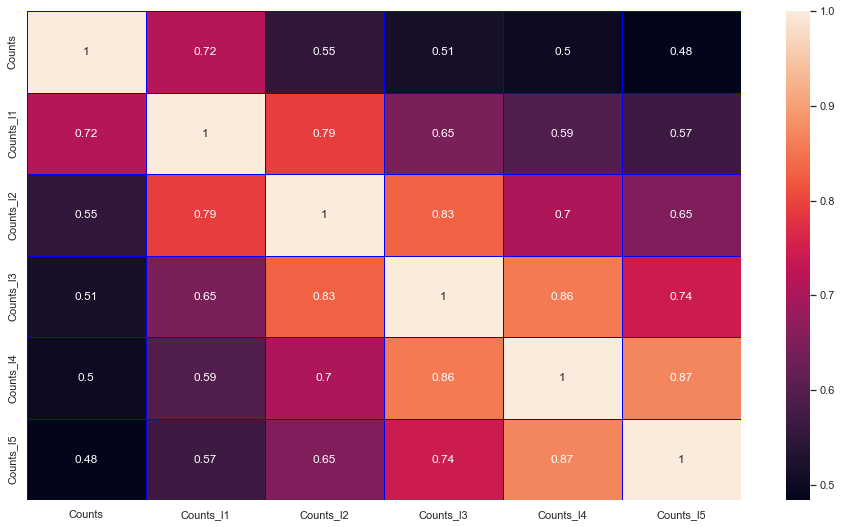

In [202]:
correlation = df_timeseriesQD.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [203]:
# Create X and y objects
X = df_timeseriesQD[['Counts_l1','Counts_l2','Counts_l3','Counts_l4']].values
y = df_timeseriesQD['Counts'].values

In [204]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


Training data Accuracy :  0.6802557791677134
Testing data  Accuracy :  -1.8032555374598611


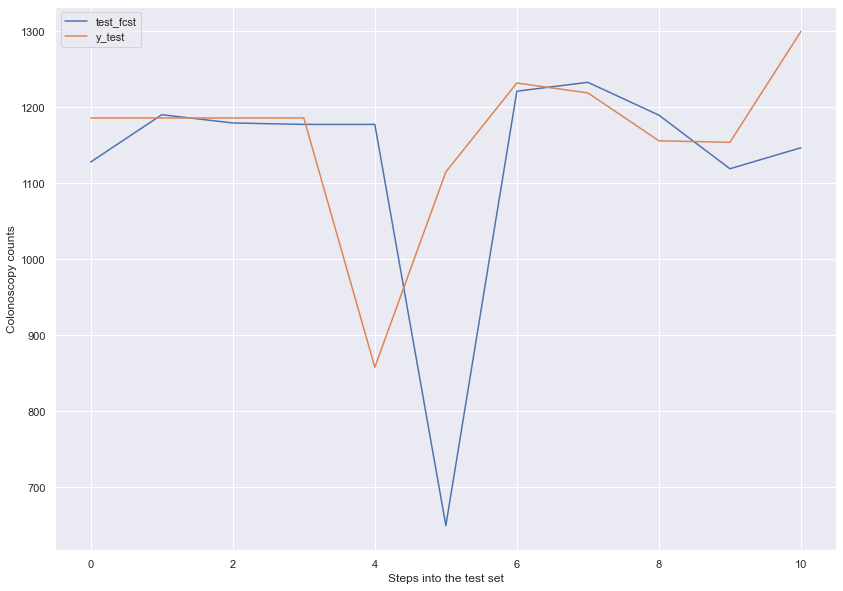

In [205]:


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [206]:
#CV

In [207]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=3)
scores.mean()

-0.011057113336341184

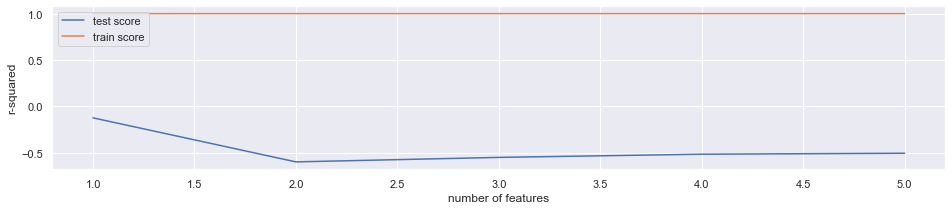

In [208]:
# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [209]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

-1.1939380609496786

# GRIDCV

In [210]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

-1.1939380609496786

In [211]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

0.6977435975715585
0.11637447242967726


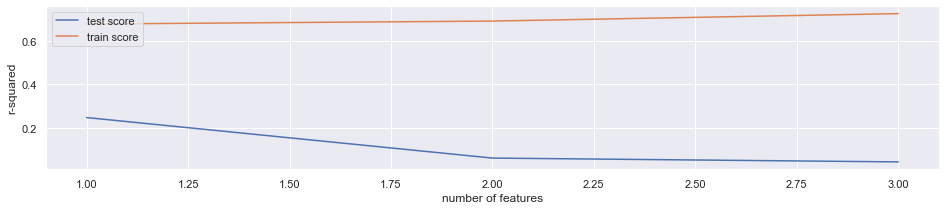

In [212]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

DT Regression

In [213]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1, shuffle = False)


In [214]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


#-----
#parameters = {
#    'n_estimators': [100, 150, 200, 250, 300],
#    'max_depth': [1,2,3,4],
#}
#regr = RandomForestRegressor(random_state=0)
#
#clf = GridSearchCV(regr, parameters)
#clf.fit(X_train, y_train)
#----

# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [215]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,1,1,0.782112,-0.296327
1,2,2,0.863399,-1.007185
2,3,3,0.875740,-1.222680
3,5,4,0.875740,-2.452626
4,4,5,0.875740,-1.707244


In [216]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor


# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=1)

In [217]:
#Predictions
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
y_train_pred


array([ 753.821     ,  753.821     , 1003.744     , 1059.83433333,
       1100.185     , 1107.646     , 1051.22      , 1011.21      ,
       1051.088     , 1099.553     , 1091.278     , 1028.625     ,
       1076.343     , 1112.424     , 1120.125     , 1183.643     ,
       1133.07406667, 1179.498     , 1143.71947619, 1083.65653333,
       1056.13260952, 1114.68733333, 1206.63966667, 1152.47006667,
       1161.32773333, 1149.34406667, 1127.8732381 , 1043.86386667,
       1043.86386667, 1089.00157143, 1177.60408571])

In [218]:
# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R2_RF_train=r2_score(y_train, y_train_pred)
R2_RF_test=r2_score(y_test,y_test_pred)

R^2 train: 0.770, test: -2.569


In [219]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [220]:

y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


8508.546738907222

In [221]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


In [222]:
import lightgbm as lgb


In [223]:
model = lgb.LGBMRegressor(random_state=42,max_depth=100)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20)

[20]	training's l2: 1.16461e+06	valid_0's l2: 969467
[40]	training's l2: 1.16461e+06	valid_0's l2: 969467
[60]	training's l2: 1.16461e+06	valid_0's l2: 969467
[80]	training's l2: 1.16461e+06	valid_0's l2: 969467
[100]	training's l2: 1.16461e+06	valid_0's l2: 969467


LGBMRegressor(max_depth=100, random_state=42)

In [224]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.0000
Testing accuracy -0.7395


In [225]:
#Yearly average above is 188. Daily average is 188/365=0.6. Will add this to the weekly numbers from the colonoscopy records

# Daily data

In [226]:
df_timeseriesD = dfcolraw.groupby(['proceduredate'])['ID'].count()


In [227]:
df_timeseriesD=pd.DataFrame(df_timeseriesD).reset_index()
df_timeseriesD=df_timeseriesD.set_index(pd.to_datetime(df_timeseriesD['proceduredate']))

df_timeseriesD = df_timeseriesD.asfreq('D','bfill')
df_timeseriesD = df_timeseriesD.sort_index()
df_timeseriesD=df_timeseriesD[['ID']]
df_timeseriesD.head(100)

,ID
proceduredate,
2014-01-03,11
2014-01-04,5
2014-01-05,5
2014-01-06,5
2014-01-07,10
...,...
2014-04-08,20
2014-04-09,16
2014-04-10,8


In [228]:
traind = df_timeseriesD[(df_timeseriesD.index < pd.to_datetime("2020-01-01", format='%Y-%m-%d')) ]
testd = df_timeseriesD[df_timeseriesD.index >= pd.to_datetime("2020-01-01", format='%Y-%m-%d')]

print(traind.shape)
print(testd.shape)
testd.tail()

(2189, 1)
(1095, 1)


,ID
proceduredate,
2022-12-26,2
2022-12-27,2
2022-12-28,2
2022-12-29,1
2022-12-30,2


In [229]:
# Create and train forecaster for Quarter
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 2
                )

forecaster.fit(y=traind['ID'])
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=1095)
predictions.tail(50)

2022-11-11    17.20979
2022-11-12    17.20979
2022-11-13    17.20979
2022-11-14    17.20979
2022-11-15    17.20979
2022-11-16    17.20979
2022-11-17    17.20979
2022-11-18    17.20979
2022-11-19    17.20979
2022-11-20    17.20979
2022-11-21    17.20979
2022-11-22    17.20979
2022-11-23    17.20979
2022-11-24    17.20979
2022-11-25    17.20979
2022-11-26    17.20979
2022-11-27    17.20979
2022-11-28    17.20979
2022-11-29    17.20979
2022-11-30    17.20979
2022-12-01    17.20979
2022-12-02    17.20979
2022-12-03    17.20979
2022-12-04    17.20979
2022-12-05    17.20979
2022-12-06    17.20979
2022-12-07    17.20979
2022-12-08    17.20979
2022-12-09    17.20979
2022-12-10    17.20979
2022-12-11    17.20979
2022-12-12    17.20979
2022-12-13    17.20979
2022-12-14    17.20979
2022-12-15    17.20979
2022-12-16    17.20979
2022-12-17    17.20979
2022-12-18    17.20979
2022-12-19    17.20979
2022-12-20    17.20979
2022-12-21    17.20979
2022-12-22    17.20979
2022-12-23    17.20979
2022-12-24 

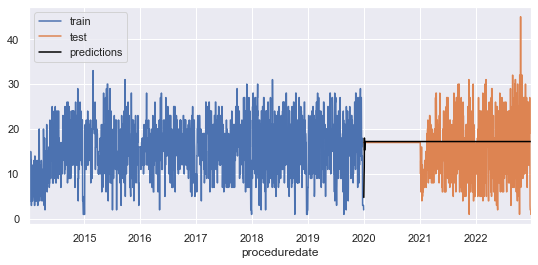

In [230]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
traind['ID'].plot(ax=ax, label='train')
testd['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [231]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testd['ID'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 34.195147865650604


In [232]:
df_daily = dfcolraw.groupby(['proceduredate','Age','Gender'])['ID'].count()
df_daily=pd.DataFrame(df_daily)
df_daily.reset_index(inplace=True)
df_daily

,proceduredate,Age,Gender,ID
0,2014-01-03,67,F,1
1,2014-01-03,67,M,2
2,2014-01-03,68,F,2
3,2014-01-03,68,M,1
4,2014-01-03,69,F,1
...,...,...,...,...
22677,2022-12-28,65,M,1
22678,2022-12-28,67,F,1
22679,2022-12-29,68,F,1
22680,2022-12-30,60,M,1


In [233]:
#Yearly average above is 188. Daily average is 188/365=0.6. Will add this to the daily numbers from the colonoscopy records
df_timeseriesPD=df_timeseriesD

df_timeseriesPD['ID']=df_timeseriesPD['ID']+1
df_timeseriesPD

,ID
proceduredate,
2014-01-03,12
2014-01-04,6
2014-01-05,6
2014-01-06,6
2014-01-07,11
...,...
2022-12-26,3
2022-12-27,3
2022-12-28,3


In [234]:
#df_timeseriesPD['Gender'] = df_timeseriesPD['Gender'].map(gendermap)


In [235]:
#df_timeseriesPD.reset_index(inplace=True)
df_timeseriesPD.rename(columns = {'ID':'Counts'}, inplace = True)
df_timeseriesPD

,Counts
proceduredate,
2014-01-03,12
2014-01-04,6
2014-01-05,6
2014-01-06,6
2014-01-07,11
...,...
2022-12-26,3
2022-12-27,3
2022-12-28,3


In [236]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
df_timeseriesPD['Counts_l1'] = df_timeseriesPD ['Counts'].shift(1)
df_timeseriesPD['Counts_l2'] = df_timeseriesPD ['Counts'].shift(2)
df_timeseriesPD['Counts_l3'] = df_timeseriesPD ['Counts'].shift(3)
df_timeseriesPD['Counts_l4'] = df_timeseriesPD ['Counts'].shift(4)
df_timeseriesPD['Counts_l5'] = df_timeseriesPD ['Counts'].shift(5)
df_timeseriesPD

,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
proceduredate,,,,,,
2014-01-03,12,NaN,NaN,NaN,NaN,NaN
2014-01-04,6,12.0,NaN,NaN,NaN,NaN
2014-01-05,6,6.0,12.0,NaN,NaN,NaN
2014-01-06,6,6.0,6.0,12.0,NaN,NaN
2014-01-07,11,6.0,6.0,6.0,12.0,NaN
...,...,...,...,...,...,...
2022-12-26,3,3.0,3.0,4.0,20.0,28.0
2022-12-27,3,3.0,3.0,3.0,4.0,20.0
2022-12-28,3,3.0,3.0,3.0,3.0,4.0


In [237]:
df_timeseriesPD.bfill(axis = 0,inplace=True)
df_timeseriesPD

,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
proceduredate,,,,,,
2014-01-03,12,12.0,12.0,12.0,12.0,12.0
2014-01-04,6,12.0,12.0,12.0,12.0,12.0
2014-01-05,6,6.0,12.0,12.0,12.0,12.0
2014-01-06,6,6.0,6.0,12.0,12.0,12.0
2014-01-07,11,6.0,6.0,6.0,12.0,12.0
...,...,...,...,...,...,...
2022-12-26,3,3.0,3.0,4.0,20.0,28.0
2022-12-27,3,3.0,3.0,3.0,4.0,20.0
2022-12-28,3,3.0,3.0,3.0,3.0,4.0


<AxesSubplot:>

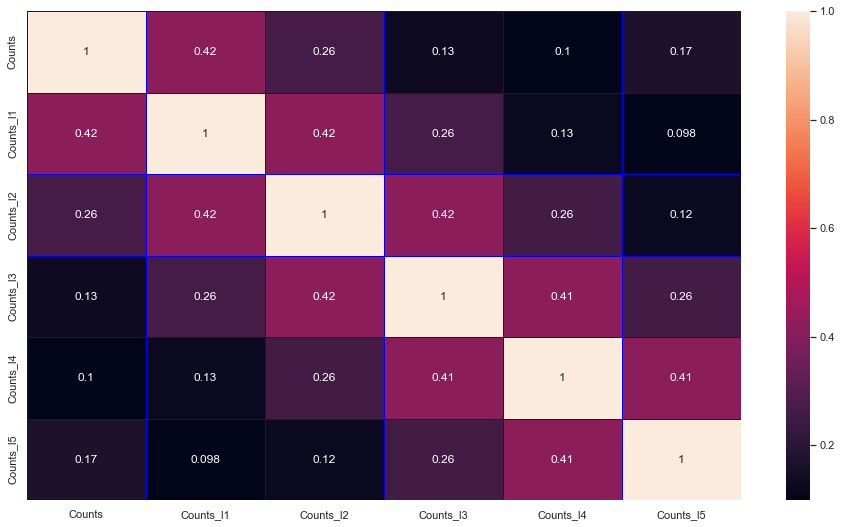

In [238]:
correlation = df_timeseriesPD.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [239]:
# Create X and y objects
X = df_timeseriesPD[['Counts_l1','Counts_l2']].values
y = df_timeseriesPD['Counts'].values

In [240]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


Training data Accuracy :  0.23144268042913274
Testing data  Accuracy :  0.05756058728254143


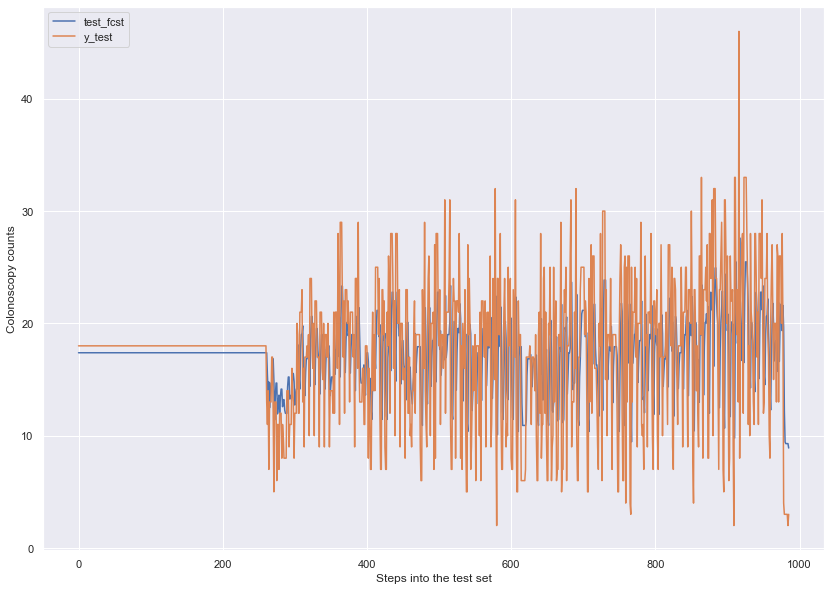

In [241]:


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [242]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=3)
scores.mean()

0.12622704676967064

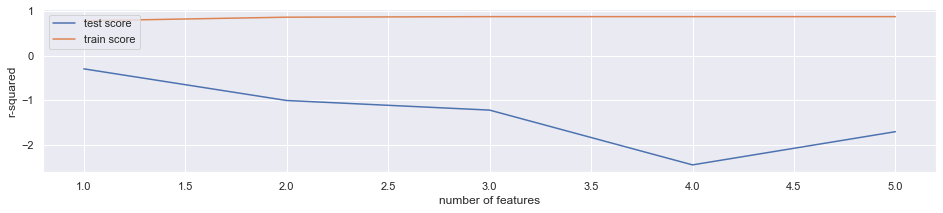

In [243]:
# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [244]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

0.1356664044279658

# GRID CV

In [245]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

0.22632626617063253
0.22437616930406215


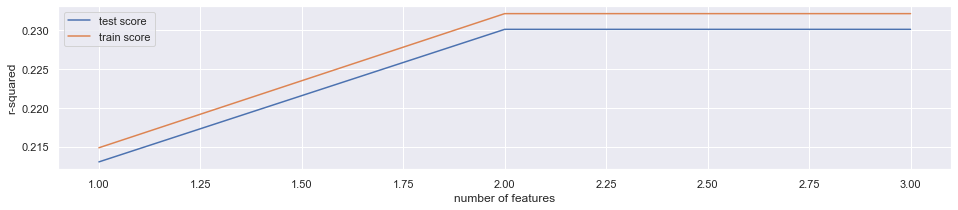

In [246]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Decision Tree

In [247]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


#-----
#parameters = {
#    'n_estimators': [100, 150, 200, 250, 300],
#    'max_depth': [1,2,3,4],
#}
#regr = RandomForestRegressor(random_state=0)
#
#clf = GridSearchCV(regr, parameters)
#clf.fit(X_train, y_train)
#----

# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [248]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,1,1,0.266261,0.217232
1,3,2,0.555045,0.047896
2,2,3,0.555045,0.048946
3,4,4,0.555045,0.046598
4,5,5,0.555045,0.045796


In [249]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor


# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=1)

In [250]:
#Predictions
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
y_train_pred


array([14.24469605, 14.24469605,  6.83707229, ..., 18.04563604,
       18.04563604, 18.04563604])

In [251]:
# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R2_RF_train=r2_score(y_train, y_train_pred)
R2_RF_test=r2_score(y_test,y_test_pred)

R^2 train: 0.492, test: -0.025


In [252]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [253]:
y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


25.39718404331715

In [254]:


parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)


In [255]:

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


25.39718404331715

# Booster Algorithm

In [256]:
model = lgb.LGBMRegressor(random_state=42,max_depth=100)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20)

[20]	training's l2: 24.1238	valid_0's l2: 34.1183
[40]	training's l2: 23.0453	valid_0's l2: 35.0279
[60]	training's l2: 22.6065	valid_0's l2: 35.3577
[80]	training's l2: 22.3111	valid_0's l2: 35.5743
[100]	training's l2: 22.0983	valid_0's l2: 35.7064


LGBMRegressor(max_depth=100, random_state=42)

In [257]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.3979
Testing accuracy 0.0450


# Network

In [258]:
# Create X and y objects
X = df_timeseriesWD[['Counts_l1','Counts_l2','Counts_l3','Counts_l4']].values
y = df_timeseriesWD['Counts'].values

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  shuffle = False)


In [259]:
from keras import Sequential
from keras.layers import Dense
from keras import models

def build_regressor():
    regressor = models.Sequential()
    regressor.add(Dense(units=9, input_shape=(X_train.shape[1],),activation='relu'))
    regressor.add(Dense(units=4, activation='relu'))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mse','mae'])
    return regressor

In [260]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=1000,epochs=5000)

In [261]:
results=regressor.fit(X_train,y_train)

Epoch 1/5000
1/1 [==============================] - 1s 619ms/step - loss: 3525.3738 - mse: 3525.3738 - mae: 53.6800
Epoch 2/5000
1/1 [==============================] - 0s 7ms/step - loss: 3460.2439 - mse: 3460.2439 - mae: 53.1653
Epoch 3/5000
1/1 [==============================] - 0s 5ms/step - loss: 3396.1179 - mse: 3396.1179 - mae: 52.6533
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 3332.6321 - mse: 3332.6321 - mae: 52.1411
Epoch 5/5000
1/1 [==============================] - 0s 5ms/step - loss: 3269.8140 - mse: 3269.8140 - mae: 51.6283
Epoch 6/5000
1/1 [==============================] - 0s 5ms/step - loss: 3207.4380 - mse: 3207.4380 - mae: 51.1127
Epoch 7/5000
1/1 [==============================] - 0s 5ms/step - loss: 3145.5645 - mse: 3145.5645 - mae: 50.5957
Epoch 8/5000
1/1 [==============================] - 0s 5ms/step - loss: 3084.0933 - mse: 3084.0933 - mae: 50.0764
Epoch 9/5000
1/1 [==============================] - 0s 4ms/step - loss: 3023.2451 - ms

1/1 [==============================] - 0s 4ms/step - loss: 610.5271 - mse: 610.5271 - mae: 19.3882
Epoch 73/5000
1/1 [==============================] - 0s 5ms/step - loss: 596.3416 - mse: 596.3416 - mae: 19.0651
Epoch 74/5000
1/1 [==============================] - 0s 5ms/step - loss: 582.7457 - mse: 582.7457 - mae: 18.7468
Epoch 75/5000
1/1 [==============================] - 0s 6ms/step - loss: 569.8239 - mse: 569.8239 - mae: 18.4399
Epoch 76/5000
1/1 [==============================] - 0s 4ms/step - loss: 557.5383 - mse: 557.5383 - mae: 18.1448
Epoch 77/5000
1/1 [==============================] - 0s 4ms/step - loss: 545.8550 - mse: 545.8550 - mae: 17.8586
Epoch 78/5000
1/1 [==============================] - 0s 5ms/step - loss: 534.6993 - mse: 534.6993 - mae: 17.5773
Epoch 79/5000
1/1 [==============================] - 0s 6ms/step - loss: 524.0833 - mse: 524.0833 - mae: 17.3017
Epoch 80/5000
1/1 [==============================] - 0s 6ms/step - loss: 514.0028 - mse: 514.0028 - mae: 17.03

1/1 [==============================] - 0s 4ms/step - loss: 394.0427 - mse: 394.0427 - mae: 13.2464
Epoch 145/5000
1/1 [==============================] - 0s 4ms/step - loss: 393.9152 - mse: 393.9152 - mae: 13.2480
Epoch 146/5000
1/1 [==============================] - 0s 4ms/step - loss: 393.7906 - mse: 393.7906 - mae: 13.2494
Epoch 147/5000
1/1 [==============================] - 0s 4ms/step - loss: 393.6684 - mse: 393.6684 - mae: 13.2507
Epoch 148/5000
1/1 [==============================] - 0s 4ms/step - loss: 393.5583 - mse: 393.5583 - mae: 13.2520
Epoch 149/5000
1/1 [==============================] - 0s 6ms/step - loss: 393.4484 - mse: 393.4484 - mae: 13.2532
Epoch 150/5000
1/1 [==============================] - 0s 6ms/step - loss: 393.3371 - mse: 393.3371 - mae: 13.2541
Epoch 151/5000
1/1 [==============================] - 0s 7ms/step - loss: 393.2244 - mse: 393.2244 - mae: 13.2549
Epoch 152/5000
1/1 [==============================] - 0s 4ms/step - loss: 393.1104 - mse: 393.1104 - ma

Epoch 216/5000
1/1 [==============================] - 0s 5ms/step - loss: 386.4123 - mse: 386.4123 - mae: 13.2290
Epoch 217/5000
1/1 [==============================] - 0s 5ms/step - loss: 386.3232 - mse: 386.3232 - mae: 13.2284
Epoch 218/5000
1/1 [==============================] - 0s 6ms/step - loss: 386.2333 - mse: 386.2333 - mae: 13.2279
Epoch 219/5000
1/1 [==============================] - 0s 8ms/step - loss: 386.1424 - mse: 386.1424 - mae: 13.2275
Epoch 220/5000
1/1 [==============================] - 0s 7ms/step - loss: 386.0510 - mse: 386.0510 - mae: 13.2270
Epoch 221/5000
1/1 [==============================] - 0s 7ms/step - loss: 385.9676 - mse: 385.9676 - mae: 13.2266
Epoch 222/5000
1/1 [==============================] - 0s 6ms/step - loss: 385.8810 - mse: 385.8810 - mae: 13.2262
Epoch 223/5000
1/1 [==============================] - 0s 8ms/step - loss: 385.7906 - mse: 385.7906 - mae: 13.2257
Epoch 224/5000
1/1 [==============================] - 0s 6ms/step - loss: 385.6971 - mse

1/1 [==============================] - 0s 8ms/step - loss: 380.6708 - mse: 380.6708 - mae: 13.2137
Epoch 288/5000
1/1 [==============================] - 0s 6ms/step - loss: 380.6189 - mse: 380.6189 - mae: 13.2135
Epoch 289/5000
1/1 [==============================] - 0s 6ms/step - loss: 380.5737 - mse: 380.5737 - mae: 13.2134
Epoch 290/5000
1/1 [==============================] - 0s 7ms/step - loss: 380.5243 - mse: 380.5243 - mae: 13.2134
Epoch 291/5000
1/1 [==============================] - 0s 6ms/step - loss: 380.4708 - mse: 380.4708 - mae: 13.2133
Epoch 292/5000
1/1 [==============================] - 0s 7ms/step - loss: 380.4138 - mse: 380.4138 - mae: 13.2132
Epoch 293/5000
1/1 [==============================] - 0s 6ms/step - loss: 380.3535 - mse: 380.3535 - mae: 13.2131
Epoch 294/5000
1/1 [==============================] - 0s 7ms/step - loss: 380.2903 - mse: 380.2903 - mae: 13.2130
Epoch 295/5000
1/1 [==============================] - 0s 6ms/step - loss: 380.2248 - mse: 380.2248 - ma

Epoch 359/5000
1/1 [==============================] - 0s 4ms/step - loss: 376.8637 - mse: 376.8637 - mae: 13.1966
Epoch 360/5000
1/1 [==============================] - 0s 4ms/step - loss: 376.8100 - mse: 376.8100 - mae: 13.1970
Epoch 361/5000
1/1 [==============================] - 0s 4ms/step - loss: 376.7617 - mse: 376.7617 - mae: 13.1977
Epoch 362/5000
1/1 [==============================] - 0s 3ms/step - loss: 376.7233 - mse: 376.7233 - mae: 13.1986
Epoch 363/5000
1/1 [==============================] - 0s 4ms/step - loss: 376.6803 - mse: 376.6803 - mae: 13.1997
Epoch 364/5000
1/1 [==============================] - 0s 3ms/step - loss: 376.6325 - mse: 376.6325 - mae: 13.2008
Epoch 365/5000
1/1 [==============================] - 0s 3ms/step - loss: 376.5828 - mse: 376.5828 - mae: 13.2020
Epoch 366/5000
1/1 [==============================] - 0s 4ms/step - loss: 376.5424 - mse: 376.5424 - mae: 13.2029
Epoch 367/5000
1/1 [==============================] - 0s 4ms/step - loss: 376.5054 - mse

1/1 [==============================] - 0s 6ms/step - loss: 374.3339 - mse: 374.3339 - mae: 13.1875
Epoch 431/5000
1/1 [==============================] - 0s 6ms/step - loss: 374.3014 - mse: 374.3014 - mae: 13.1870
Epoch 432/5000
1/1 [==============================] - 0s 7ms/step - loss: 374.2912 - mse: 374.2912 - mae: 13.1869
Epoch 433/5000
1/1 [==============================] - 0s 8ms/step - loss: 374.2572 - mse: 374.2572 - mae: 13.1866
Epoch 434/5000
1/1 [==============================] - 0s 7ms/step - loss: 374.2049 - mse: 374.2049 - mae: 13.1862
Epoch 435/5000
1/1 [==============================] - 0s 7ms/step - loss: 374.1781 - mse: 374.1781 - mae: 13.1861
Epoch 436/5000
1/1 [==============================] - 0s 5ms/step - loss: 374.1525 - mse: 374.1525 - mae: 13.1863
Epoch 437/5000
1/1 [==============================] - 0s 8ms/step - loss: 374.1175 - mse: 374.1175 - mae: 13.1862
Epoch 438/5000
1/1 [==============================] - 0s 7ms/step - loss: 374.0785 - mse: 374.0785 - ma

Epoch 502/5000
1/1 [==============================] - 0s 4ms/step - loss: 372.1551 - mse: 372.1551 - mae: 13.1674
Epoch 503/5000
1/1 [==============================] - 0s 5ms/step - loss: 372.1382 - mse: 372.1382 - mae: 13.1673
Epoch 504/5000
1/1 [==============================] - 0s 6ms/step - loss: 372.1054 - mse: 372.1054 - mae: 13.1669
Epoch 505/5000
1/1 [==============================] - 0s 4ms/step - loss: 372.0671 - mse: 372.0671 - mae: 13.1664
Epoch 506/5000
1/1 [==============================] - 0s 6ms/step - loss: 372.0466 - mse: 372.0466 - mae: 13.1658
Epoch 507/5000
1/1 [==============================] - 0s 4ms/step - loss: 372.0164 - mse: 372.0164 - mae: 13.1652
Epoch 508/5000
1/1 [==============================] - 0s 5ms/step - loss: 371.9753 - mse: 371.9753 - mae: 13.1645
Epoch 509/5000
1/1 [==============================] - 0s 3ms/step - loss: 371.9557 - mse: 371.9557 - mae: 13.1640
Epoch 510/5000
1/1 [==============================] - 0s 3ms/step - loss: 371.9236 - mse

1/1 [==============================] - 0s 7ms/step - loss: 370.0780 - mse: 370.0780 - mae: 13.1391
Epoch 574/5000
1/1 [==============================] - 0s 6ms/step - loss: 370.0471 - mse: 370.0471 - mae: 13.1386
Epoch 575/5000
1/1 [==============================] - 0s 5ms/step - loss: 370.0188 - mse: 370.0188 - mae: 13.1381
Epoch 576/5000
1/1 [==============================] - 0s 5ms/step - loss: 369.9939 - mse: 369.9939 - mae: 13.1376
Epoch 577/5000
1/1 [==============================] - 0s 4ms/step - loss: 369.9628 - mse: 369.9628 - mae: 13.1371
Epoch 578/5000
1/1 [==============================] - 0s 3ms/step - loss: 369.9400 - mse: 369.9400 - mae: 13.1369
Epoch 579/5000
1/1 [==============================] - 0s 4ms/step - loss: 369.9048 - mse: 369.9048 - mae: 13.1366
Epoch 580/5000
1/1 [==============================] - 0s 4ms/step - loss: 369.8843 - mse: 369.8843 - mae: 13.1365
Epoch 581/5000
1/1 [==============================] - 0s 6ms/step - loss: 369.8498 - mse: 369.8498 - ma

Epoch 645/5000
1/1 [==============================] - 0s 3ms/step - loss: 368.0430 - mse: 368.0430 - mae: 13.1095
Epoch 646/5000
1/1 [==============================] - 0s 5ms/step - loss: 368.0052 - mse: 368.0052 - mae: 13.1090
Epoch 647/5000
1/1 [==============================] - 0s 5ms/step - loss: 367.9735 - mse: 367.9735 - mae: 13.1088
Epoch 648/5000
1/1 [==============================] - 0s 3ms/step - loss: 367.9392 - mse: 367.9392 - mae: 13.1082
Epoch 649/5000
1/1 [==============================] - 0s 4ms/step - loss: 367.9025 - mse: 367.9025 - mae: 13.1076
Epoch 650/5000
1/1 [==============================] - 0s 4ms/step - loss: 367.8628 - mse: 367.8628 - mae: 13.1067
Epoch 651/5000
1/1 [==============================] - 0s 5ms/step - loss: 367.8205 - mse: 367.8205 - mae: 13.1057
Epoch 652/5000
1/1 [==============================] - 0s 3ms/step - loss: 367.7971 - mse: 367.7971 - mae: 13.1048
Epoch 653/5000
1/1 [==============================] - 0s 3ms/step - loss: 367.7617 - mse

1/1 [==============================] - 0s 7ms/step - loss: 365.0163 - mse: 365.0163 - mae: 13.0585
Epoch 717/5000
1/1 [==============================] - 0s 7ms/step - loss: 364.9628 - mse: 364.9628 - mae: 13.0576
Epoch 718/5000
1/1 [==============================] - 0s 8ms/step - loss: 364.9056 - mse: 364.9056 - mae: 13.0565
Epoch 719/5000
1/1 [==============================] - 0s 6ms/step - loss: 364.8483 - mse: 364.8483 - mae: 13.0552
Epoch 720/5000
1/1 [==============================] - 0s 6ms/step - loss: 364.8011 - mse: 364.8011 - mae: 13.0541
Epoch 721/5000
1/1 [==============================] - 0s 6ms/step - loss: 364.7683 - mse: 364.7683 - mae: 13.0531
Epoch 722/5000
1/1 [==============================] - 0s 8ms/step - loss: 364.7327 - mse: 364.7327 - mae: 13.0525
Epoch 723/5000
1/1 [==============================] - 0s 6ms/step - loss: 364.6880 - mse: 364.6880 - mae: 13.0522
Epoch 724/5000
1/1 [==============================] - 0s 9ms/step - loss: 364.6357 - mse: 364.6357 - ma

Epoch 788/5000
1/1 [==============================] - 0s 6ms/step - loss: 362.5055 - mse: 362.5055 - mae: 13.0262
Epoch 789/5000
1/1 [==============================] - 0s 3ms/step - loss: 362.4706 - mse: 362.4706 - mae: 13.0258
Epoch 790/5000
1/1 [==============================] - 0s 7ms/step - loss: 362.4443 - mse: 362.4443 - mae: 13.0250
Epoch 791/5000
1/1 [==============================] - 0s 6ms/step - loss: 362.4197 - mse: 362.4197 - mae: 13.0243
Epoch 792/5000
1/1 [==============================] - 0s 6ms/step - loss: 362.3901 - mse: 362.3901 - mae: 13.0237
Epoch 793/5000
1/1 [==============================] - 0s 4ms/step - loss: 362.3558 - mse: 362.3558 - mae: 13.0232
Epoch 794/5000
1/1 [==============================] - 0s 5ms/step - loss: 362.3206 - mse: 362.3206 - mae: 13.0227
Epoch 795/5000
1/1 [==============================] - 0s 6ms/step - loss: 362.2926 - mse: 362.2926 - mae: 13.0219
Epoch 796/5000
1/1 [==============================] - 0s 4ms/step - loss: 362.2646 - mse

1/1 [==============================] - 0s 3ms/step - loss: 360.8128 - mse: 360.8128 - mae: 12.9927
Epoch 860/5000
1/1 [==============================] - 0s 4ms/step - loss: 360.7855 - mse: 360.7855 - mae: 12.9919
Epoch 861/5000
1/1 [==============================] - 0s 3ms/step - loss: 360.7710 - mse: 360.7710 - mae: 12.9910
Epoch 862/5000
1/1 [==============================] - 0s 4ms/step - loss: 360.7560 - mse: 360.7560 - mae: 12.9905
Epoch 863/5000
1/1 [==============================] - 0s 4ms/step - loss: 360.7338 - mse: 360.7338 - mae: 12.9901
Epoch 864/5000
1/1 [==============================] - 0s 4ms/step - loss: 360.7053 - mse: 360.7053 - mae: 12.9898
Epoch 865/5000
1/1 [==============================] - 0s 5ms/step - loss: 360.6911 - mse: 360.6911 - mae: 12.9899
Epoch 866/5000
1/1 [==============================] - 0s 4ms/step - loss: 360.6736 - mse: 360.6736 - mae: 12.9897
Epoch 867/5000
1/1 [==============================] - 0s 4ms/step - loss: 360.6407 - mse: 360.6407 - ma

Epoch 931/5000
1/1 [==============================] - 0s 3ms/step - loss: 359.4043 - mse: 359.4043 - mae: 12.9663
Epoch 932/5000
1/1 [==============================] - 0s 3ms/step - loss: 359.3759 - mse: 359.3759 - mae: 12.9653
Epoch 933/5000
1/1 [==============================] - 0s 3ms/step - loss: 359.3662 - mse: 359.3662 - mae: 12.9642
Epoch 934/5000
1/1 [==============================] - 0s 3ms/step - loss: 359.3572 - mse: 359.3572 - mae: 12.9635
Epoch 935/5000
1/1 [==============================] - 0s 4ms/step - loss: 359.3433 - mse: 359.3433 - mae: 12.9630
Epoch 936/5000
1/1 [==============================] - 0s 4ms/step - loss: 359.3245 - mse: 359.3245 - mae: 12.9627
Epoch 937/5000
1/1 [==============================] - 0s 4ms/step - loss: 359.3017 - mse: 359.3017 - mae: 12.9625
Epoch 938/5000
1/1 [==============================] - 0s 3ms/step - loss: 359.2756 - mse: 359.2756 - mae: 12.9625
Epoch 939/5000
1/1 [==============================] - 0s 3ms/step - loss: 359.2657 - mse

1/1 [==============================] - 0s 3ms/step - loss: 358.3455 - mse: 358.3455 - mae: 12.9462
Epoch 1003/5000
1/1 [==============================] - 0s 3ms/step - loss: 358.3337 - mse: 358.3337 - mae: 12.9460
Epoch 1004/5000
1/1 [==============================] - 0s 3ms/step - loss: 358.3183 - mse: 358.3183 - mae: 12.9460
Epoch 1005/5000
1/1 [==============================] - 0s 5ms/step - loss: 358.3002 - mse: 358.3002 - mae: 12.9462
Epoch 1006/5000
1/1 [==============================] - 0s 3ms/step - loss: 358.2934 - mse: 358.2934 - mae: 12.9467
Epoch 1007/5000
1/1 [==============================] - 0s 4ms/step - loss: 358.2771 - mse: 358.2771 - mae: 12.9465
Epoch 1008/5000
1/1 [==============================] - 0s 4ms/step - loss: 358.2681 - mse: 358.2681 - mae: 12.9459
Epoch 1009/5000
1/1 [==============================] - 0s 4ms/step - loss: 358.2629 - mse: 358.2629 - mae: 12.9457
Epoch 1010/5000
1/1 [==============================] - 0s 5ms/step - loss: 358.2537 - mse: 358.2

1/1 [==============================] - 0s 7ms/step - loss: 357.5412 - mse: 357.5412 - mae: 12.9335
Epoch 1074/5000
1/1 [==============================] - 0s 7ms/step - loss: 357.5295 - mse: 357.5295 - mae: 12.9329
Epoch 1075/5000
1/1 [==============================] - 0s 7ms/step - loss: 357.5162 - mse: 357.5162 - mae: 12.9324
Epoch 1076/5000
1/1 [==============================] - 0s 5ms/step - loss: 357.5133 - mse: 357.5133 - mae: 12.9321
Epoch 1077/5000
1/1 [==============================] - 0s 7ms/step - loss: 357.4936 - mse: 357.4936 - mae: 12.9314
Epoch 1078/5000
1/1 [==============================] - 0s 6ms/step - loss: 357.4836 - mse: 357.4836 - mae: 12.9309
Epoch 1079/5000
1/1 [==============================] - 0s 6ms/step - loss: 357.4717 - mse: 357.4717 - mae: 12.9306
Epoch 1080/5000
1/1 [==============================] - 0s 5ms/step - loss: 357.4582 - mse: 357.4582 - mae: 12.9304
Epoch 1081/5000
1/1 [==============================] - 0s 6ms/step - loss: 357.4510 - mse: 357.4

1/1 [==============================] - 0s 6ms/step - loss: 356.8281 - mse: 356.8281 - mae: 12.9172
Epoch 1145/5000
1/1 [==============================] - 0s 6ms/step - loss: 356.8141 - mse: 356.8141 - mae: 12.9174
Epoch 1146/5000
1/1 [==============================] - 0s 6ms/step - loss: 356.8132 - mse: 356.8132 - mae: 12.9177
Epoch 1147/5000
1/1 [==============================] - 0s 6ms/step - loss: 356.8000 - mse: 356.8000 - mae: 12.9175
Epoch 1148/5000
1/1 [==============================] - 0s 6ms/step - loss: 356.7905 - mse: 356.7905 - mae: 12.9171
Epoch 1149/5000
1/1 [==============================] - 0s 6ms/step - loss: 356.7872 - mse: 356.7872 - mae: 12.9167
Epoch 1150/5000
1/1 [==============================] - 0s 6ms/step - loss: 356.7820 - mse: 356.7820 - mae: 12.9165
Epoch 1151/5000
1/1 [==============================] - 0s 7ms/step - loss: 356.7749 - mse: 356.7749 - mae: 12.9164
Epoch 1152/5000
1/1 [==============================] - 0s 7ms/step - loss: 356.7661 - mse: 356.7

1/1 [==============================] - 0s 5ms/step - loss: 356.2399 - mse: 356.2399 - mae: 12.9026
Epoch 1216/5000
1/1 [==============================] - 0s 4ms/step - loss: 356.2303 - mse: 356.2303 - mae: 12.9025
Epoch 1217/5000
1/1 [==============================] - 0s 5ms/step - loss: 356.2197 - mse: 356.2197 - mae: 12.9025
Epoch 1218/5000
1/1 [==============================] - 0s 5ms/step - loss: 356.2085 - mse: 356.2085 - mae: 12.9025
Epoch 1219/5000
1/1 [==============================] - 0s 6ms/step - loss: 356.1969 - mse: 356.1969 - mae: 12.9026
Epoch 1220/5000
1/1 [==============================] - 0s 4ms/step - loss: 356.1998 - mse: 356.1998 - mae: 12.9028
Epoch 1221/5000
1/1 [==============================] - 0s 4ms/step - loss: 356.1779 - mse: 356.1779 - mae: 12.9024
Epoch 1222/5000
1/1 [==============================] - 0s 4ms/step - loss: 356.1702 - mse: 356.1702 - mae: 12.9021
Epoch 1223/5000
1/1 [==============================] - 0s 4ms/step - loss: 356.1615 - mse: 356.1

1/1 [==============================] - 0s 3ms/step - loss: 355.6060 - mse: 355.6060 - mae: 12.8889
Epoch 1287/5000
1/1 [==============================] - 0s 5ms/step - loss: 355.5965 - mse: 355.5965 - mae: 12.8889
Epoch 1288/5000
1/1 [==============================] - 0s 5ms/step - loss: 355.5868 - mse: 355.5868 - mae: 12.8890
Epoch 1289/5000
1/1 [==============================] - 0s 4ms/step - loss: 355.5768 - mse: 355.5768 - mae: 12.8890
Epoch 1290/5000
1/1 [==============================] - 0s 5ms/step - loss: 355.5848 - mse: 355.5848 - mae: 12.8893
Epoch 1291/5000
1/1 [==============================] - 0s 4ms/step - loss: 355.5608 - mse: 355.5608 - mae: 12.8887
Epoch 1292/5000
1/1 [==============================] - 0s 3ms/step - loss: 355.5543 - mse: 355.5543 - mae: 12.8883
Epoch 1293/5000
1/1 [==============================] - 0s 5ms/step - loss: 355.5473 - mse: 355.5473 - mae: 12.8880
Epoch 1294/5000
1/1 [==============================] - 0s 5ms/step - loss: 355.5396 - mse: 355.5

1/1 [==============================] - 0s 4ms/step - loss: 355.0546 - mse: 355.0546 - mae: 12.8828
Epoch 1358/5000
1/1 [==============================] - 0s 3ms/step - loss: 355.0458 - mse: 355.0458 - mae: 12.8829
Epoch 1359/5000
1/1 [==============================] - 0s 3ms/step - loss: 355.0517 - mse: 355.0517 - mae: 12.8832
Epoch 1360/5000
1/1 [==============================] - 0s 3ms/step - loss: 355.0320 - mse: 355.0320 - mae: 12.8827
Epoch 1361/5000
1/1 [==============================] - 0s 3ms/step - loss: 355.0268 - mse: 355.0268 - mae: 12.8824
Epoch 1362/5000
1/1 [==============================] - 0s 4ms/step - loss: 355.0209 - mse: 355.0209 - mae: 12.8822
Epoch 1363/5000
1/1 [==============================] - 0s 5ms/step - loss: 355.0145 - mse: 355.0145 - mae: 12.8820
Epoch 1364/5000
1/1 [==============================] - 0s 5ms/step - loss: 355.0074 - mse: 355.0074 - mae: 12.8820
Epoch 1365/5000
1/1 [==============================] - 0s 6ms/step - loss: 354.9997 - mse: 354.9

1/1 [==============================] - 0s 4ms/step - loss: 354.5863 - mse: 354.5863 - mae: 12.8818
Epoch 1429/5000
1/1 [==============================] - 0s 3ms/step - loss: 354.5646 - mse: 354.5646 - mae: 12.8813
Epoch 1430/5000
1/1 [==============================] - 0s 3ms/step - loss: 354.5600 - mse: 354.5600 - mae: 12.8810
Epoch 1431/5000
1/1 [==============================] - 0s 4ms/step - loss: 354.5549 - mse: 354.5549 - mae: 12.8808
Epoch 1432/5000
1/1 [==============================] - 0s 3ms/step - loss: 354.5492 - mse: 354.5492 - mae: 12.8806
Epoch 1433/5000
1/1 [==============================] - 0s 3ms/step - loss: 354.5428 - mse: 354.5428 - mae: 12.8805
Epoch 1434/5000
1/1 [==============================] - 0s 4ms/step - loss: 354.5358 - mse: 354.5358 - mae: 12.8805
Epoch 1435/5000
1/1 [==============================] - 0s 4ms/step - loss: 354.5283 - mse: 354.5283 - mae: 12.8806
Epoch 1436/5000
1/1 [==============================] - 0s 4ms/step - loss: 354.5204 - mse: 354.5

1/1 [==============================] - 0s 4ms/step - loss: 354.1368 - mse: 354.1368 - mae: 12.8805
Epoch 1500/5000
1/1 [==============================] - 0s 3ms/step - loss: 354.1300 - mse: 354.1300 - mae: 12.8805
Epoch 1501/5000
1/1 [==============================] - 0s 5ms/step - loss: 354.1227 - mse: 354.1227 - mae: 12.8806
Epoch 1502/5000
1/1 [==============================] - 0s 3ms/step - loss: 354.1180 - mse: 354.1180 - mae: 12.8808
Epoch 1503/5000
1/1 [==============================] - 0s 4ms/step - loss: 354.1123 - mse: 354.1123 - mae: 12.8805
Epoch 1504/5000
1/1 [==============================] - 0s 5ms/step - loss: 354.1089 - mse: 354.1089 - mae: 12.8804
Epoch 1505/5000
1/1 [==============================] - 0s 4ms/step - loss: 354.1046 - mse: 354.1046 - mae: 12.8804
Epoch 1506/5000
1/1 [==============================] - 0s 4ms/step - loss: 354.0993 - mse: 354.0993 - mae: 12.8804
Epoch 1507/5000
1/1 [==============================] - 0s 3ms/step - loss: 354.0931 - mse: 354.0

1/1 [==============================] - 0s 3ms/step - loss: 353.6373 - mse: 353.6373 - mae: 12.8769
Epoch 1571/5000
1/1 [==============================] - 0s 4ms/step - loss: 353.6263 - mse: 353.6263 - mae: 12.8769
Epoch 1572/5000
1/1 [==============================] - 0s 4ms/step - loss: 353.6156 - mse: 353.6156 - mae: 12.8767
Epoch 1573/5000
1/1 [==============================] - 0s 3ms/step - loss: 353.6006 - mse: 353.6006 - mae: 12.8759
Epoch 1574/5000
1/1 [==============================] - 0s 3ms/step - loss: 353.5867 - mse: 353.5867 - mae: 12.8750
Epoch 1575/5000
1/1 [==============================] - 0s 4ms/step - loss: 353.5699 - mse: 353.5699 - mae: 12.8741
Epoch 1576/5000
1/1 [==============================] - 0s 4ms/step - loss: 353.5504 - mse: 353.5504 - mae: 12.8732
Epoch 1577/5000
1/1 [==============================] - 0s 3ms/step - loss: 353.5336 - mse: 353.5336 - mae: 12.8722
Epoch 1578/5000
1/1 [==============================] - 0s 3ms/step - loss: 353.5157 - mse: 353.5

1/1 [==============================] - 0s 7ms/step - loss: 348.1084 - mse: 348.1084 - mae: 12.8029
Epoch 1642/5000
1/1 [==============================] - 0s 3ms/step - loss: 348.0948 - mse: 348.0948 - mae: 12.8036
Epoch 1643/5000
1/1 [==============================] - 0s 7ms/step - loss: 348.0813 - mse: 348.0813 - mae: 12.8044
Epoch 1644/5000
1/1 [==============================] - 0s 6ms/step - loss: 348.0872 - mse: 348.0872 - mae: 12.8056
Epoch 1645/5000
1/1 [==============================] - 0s 5ms/step - loss: 348.0860 - mse: 348.0860 - mae: 12.8060
Epoch 1646/5000
1/1 [==============================] - 0s 5ms/step - loss: 348.0764 - mse: 348.0764 - mae: 12.8057
Epoch 1647/5000
1/1 [==============================] - 0s 5ms/step - loss: 348.0606 - mse: 348.0606 - mae: 12.8048
Epoch 1648/5000
1/1 [==============================] - 0s 6ms/step - loss: 348.0414 - mse: 348.0414 - mae: 12.8034
Epoch 1649/5000
1/1 [==============================] - 0s 6ms/step - loss: 348.0433 - mse: 348.0

1/1 [==============================] - 0s 3ms/step - loss: 347.5832 - mse: 347.5832 - mae: 12.8012
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 347.5738 - mse: 347.5738 - mae: 12.8015
Epoch 1714/5000
1/1 [==============================] - 0s 4ms/step - loss: 347.5721 - mse: 347.5721 - mae: 12.8022
Epoch 1715/5000
1/1 [==============================] - 0s 3ms/step - loss: 347.5663 - mse: 347.5663 - mae: 12.8023
Epoch 1716/5000
1/1 [==============================] - 0s 3ms/step - loss: 347.5544 - mse: 347.5544 - mae: 12.8018
Epoch 1717/5000
1/1 [==============================] - 0s 3ms/step - loss: 347.5501 - mse: 347.5501 - mae: 12.8011
Epoch 1718/5000
1/1 [==============================] - 0s 3ms/step - loss: 347.5469 - mse: 347.5469 - mae: 12.8007
Epoch 1719/5000
1/1 [==============================] - 0s 3ms/step - loss: 347.5415 - mse: 347.5415 - mae: 12.8006
Epoch 1720/5000
1/1 [==============================] - 0s 4ms/step - loss: 347.5339 - mse: 347.5

1/1 [==============================] - 0s 5ms/step - loss: 347.1223 - mse: 347.1223 - mae: 12.8004
Epoch 1784/5000
1/1 [==============================] - 0s 4ms/step - loss: 347.1151 - mse: 347.1151 - mae: 12.8008
Epoch 1785/5000
1/1 [==============================] - 0s 5ms/step - loss: 347.1141 - mse: 347.1141 - mae: 12.8017
Epoch 1786/5000
1/1 [==============================] - 0s 4ms/step - loss: 347.1107 - mse: 347.1107 - mae: 12.8020
Epoch 1787/5000
1/1 [==============================] - 0s 4ms/step - loss: 347.1026 - mse: 347.1026 - mae: 12.8018
Epoch 1788/5000
1/1 [==============================] - 0s 4ms/step - loss: 347.0907 - mse: 347.0907 - mae: 12.8010
Epoch 1789/5000
1/1 [==============================] - 0s 5ms/step - loss: 347.0886 - mse: 347.0886 - mae: 12.8003
Epoch 1790/5000
1/1 [==============================] - 0s 5ms/step - loss: 347.0836 - mse: 347.0836 - mae: 12.7999
Epoch 1791/5000
1/1 [==============================] - 0s 3ms/step - loss: 347.0737 - mse: 347.0

1/1 [==============================] - 0s 5ms/step - loss: 346.7156 - mse: 346.7156 - mae: 12.7996
Epoch 1855/5000
1/1 [==============================] - 0s 5ms/step - loss: 346.7049 - mse: 346.7049 - mae: 12.7991
Epoch 1856/5000
1/1 [==============================] - 0s 4ms/step - loss: 346.6991 - mse: 346.6991 - mae: 12.7985
Epoch 1857/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.6918 - mse: 346.6918 - mae: 12.7983
Epoch 1858/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.6846 - mse: 346.6846 - mae: 12.7985
Epoch 1859/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.6759 - mse: 346.6759 - mae: 12.7984
Epoch 1860/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.6766 - mse: 346.6766 - mae: 12.7983
Epoch 1861/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.6725 - mse: 346.6725 - mae: 12.7985
Epoch 1862/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.6629 - mse: 346.6

1/1 [==============================] - 0s 3ms/step - loss: 346.2838 - mse: 346.2838 - mae: 12.7972
Epoch 1926/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.2743 - mse: 346.2743 - mae: 12.7973
Epoch 1927/5000
1/1 [==============================] - 0s 2ms/step - loss: 346.2740 - mse: 346.2740 - mae: 12.7979
Epoch 1928/5000
1/1 [==============================] - 0s 5ms/step - loss: 346.2700 - mse: 346.2700 - mae: 12.7981
Epoch 1929/5000
1/1 [==============================] - 0s 4ms/step - loss: 346.2630 - mse: 346.2630 - mae: 12.7977
Epoch 1930/5000
1/1 [==============================] - 0s 4ms/step - loss: 346.2538 - mse: 346.2538 - mae: 12.7977
Epoch 1931/5000
1/1 [==============================] - 0s 5ms/step - loss: 346.2470 - mse: 346.2470 - mae: 12.7973
Epoch 1932/5000
1/1 [==============================] - 0s 5ms/step - loss: 346.2480 - mse: 346.2480 - mae: 12.7961
Epoch 1933/5000
1/1 [==============================] - 0s 6ms/step - loss: 346.2530 - mse: 346.2

1/1 [==============================] - 0s 3ms/step - loss: 345.8544 - mse: 345.8544 - mae: 12.7948
Epoch 1997/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.8501 - mse: 345.8501 - mae: 12.7945
Epoch 1998/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.8544 - mse: 345.8544 - mae: 12.7946
Epoch 1999/5000
1/1 [==============================] - 0s 5ms/step - loss: 345.8415 - mse: 345.8415 - mae: 12.7940
Epoch 2000/5000
1/1 [==============================] - 0s 5ms/step - loss: 345.8370 - mse: 345.8370 - mae: 12.7938
Epoch 2001/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.8322 - mse: 345.8322 - mae: 12.7941
Epoch 2002/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.8217 - mse: 345.8217 - mae: 12.7951
Epoch 2003/5000
1/1 [==============================] - 0s 5ms/step - loss: 345.8142 - mse: 345.8142 - mae: 12.7949
Epoch 2004/5000
1/1 [==============================] - 0s 6ms/step - loss: 345.8068 - mse: 345.8

1/1 [==============================] - 0s 6ms/step - loss: 345.4614 - mse: 345.4614 - mae: 12.7911
Epoch 2068/5000
1/1 [==============================] - 0s 6ms/step - loss: 345.4341 - mse: 345.4341 - mae: 12.7919
Epoch 2069/5000
1/1 [==============================] - 0s 6ms/step - loss: 345.4670 - mse: 345.4670 - mae: 12.7941
Epoch 2070/5000
1/1 [==============================] - 0s 5ms/step - loss: 345.4433 - mse: 345.4433 - mae: 12.7936
Epoch 2071/5000
1/1 [==============================] - 0s 6ms/step - loss: 345.4184 - mse: 345.4184 - mae: 12.7918
Epoch 2072/5000
1/1 [==============================] - 0s 5ms/step - loss: 345.4581 - mse: 345.4581 - mae: 12.7918
Epoch 2073/5000
1/1 [==============================] - 0s 6ms/step - loss: 345.4602 - mse: 345.4602 - mae: 12.7918
Epoch 2074/5000
1/1 [==============================] - 0s 6ms/step - loss: 345.4117 - mse: 345.4117 - mae: 12.7915
Epoch 2075/5000
1/1 [==============================] - 0s 6ms/step - loss: 345.4157 - mse: 345.4

1/1 [==============================] - 0s 4ms/step - loss: 345.0294 - mse: 345.0294 - mae: 12.7892
Epoch 2139/5000
1/1 [==============================] - 0s 6ms/step - loss: 345.0137 - mse: 345.0137 - mae: 12.7890
Epoch 2140/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.0113 - mse: 345.0113 - mae: 12.7893
Epoch 2141/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.0030 - mse: 345.0030 - mae: 12.7891
Epoch 2142/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.0060 - mse: 345.0060 - mae: 12.7888
Epoch 2143/5000
1/1 [==============================] - 0s 5ms/step - loss: 344.9886 - mse: 344.9886 - mae: 12.7887
Epoch 2144/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.9898 - mse: 344.9898 - mae: 12.7893
Epoch 2145/5000
1/1 [==============================] - 0s 6ms/step - loss: 344.9817 - mse: 344.9817 - mae: 12.7892
Epoch 2146/5000
1/1 [==============================] - 0s 5ms/step - loss: 344.9705 - mse: 344.9

1/1 [==============================] - 0s 4ms/step - loss: 344.6201 - mse: 344.6201 - mae: 12.7883
Epoch 2210/5000
1/1 [==============================] - 0s 3ms/step - loss: 344.6193 - mse: 344.6193 - mae: 12.7891
Epoch 2211/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.6131 - mse: 344.6131 - mae: 12.7891
Epoch 2212/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.6158 - mse: 344.6158 - mae: 12.7886
Epoch 2213/5000
1/1 [==============================] - 0s 5ms/step - loss: 344.6133 - mse: 344.6133 - mae: 12.7882
Epoch 2214/5000
1/1 [==============================] - 0s 5ms/step - loss: 344.5926 - mse: 344.5926 - mae: 12.7878
Epoch 2215/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.5882 - mse: 344.5882 - mae: 12.7874
Epoch 2216/5000
1/1 [==============================] - 0s 3ms/step - loss: 344.5791 - mse: 344.5791 - mae: 12.7866
Epoch 2217/5000
1/1 [==============================] - 0s 3ms/step - loss: 344.5760 - mse: 344.5

1/1 [==============================] - 0s 3ms/step - loss: 344.2386 - mse: 344.2386 - mae: 12.7862
Epoch 2281/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.2794 - mse: 344.2794 - mae: 12.7884
Epoch 2282/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.2519 - mse: 344.2519 - mae: 12.7878
Epoch 2283/5000
1/1 [==============================] - 0s 5ms/step - loss: 344.2477 - mse: 344.2477 - mae: 12.7869
Epoch 2284/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.2734 - mse: 344.2734 - mae: 12.7874
Epoch 2285/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.2638 - mse: 344.2638 - mae: 12.7876
Epoch 2286/5000
1/1 [==============================] - 0s 5ms/step - loss: 344.2246 - mse: 344.2246 - mae: 12.7875
Epoch 2287/5000
1/1 [==============================] - 0s 3ms/step - loss: 344.2151 - mse: 344.2151 - mae: 12.7888
Epoch 2288/5000
1/1 [==============================] - 0s 3ms/step - loss: 344.2677 - mse: 344.2

1/1 [==============================] - 0s 3ms/step - loss: 343.8834 - mse: 343.8834 - mae: 12.7868
Epoch 2352/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.8555 - mse: 343.8555 - mae: 12.7856
Epoch 2353/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.8620 - mse: 343.8620 - mae: 12.7854
Epoch 2354/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.8472 - mse: 343.8472 - mae: 12.7852
Epoch 2355/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.8624 - mse: 343.8624 - mae: 12.7862
Epoch 2356/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.8324 - mse: 343.8324 - mae: 12.7851
Epoch 2357/5000
1/1 [==============================] - 0s 5ms/step - loss: 343.8358 - mse: 343.8358 - mae: 12.7850
Epoch 2358/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.8234 - mse: 343.8234 - mae: 12.7849
Epoch 2359/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.8233 - mse: 343.8

1/1 [==============================] - 0s 5ms/step - loss: 343.5158 - mse: 343.5158 - mae: 12.7866
Epoch 2423/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.5107 - mse: 343.5107 - mae: 12.7863
Epoch 2424/5000
1/1 [==============================] - 0s 5ms/step - loss: 343.4933 - mse: 343.4933 - mae: 12.7860
Epoch 2425/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.5134 - mse: 343.5134 - mae: 12.7868
Epoch 2426/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.4818 - mse: 343.4818 - mae: 12.7853
Epoch 2427/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.4836 - mse: 343.4836 - mae: 12.7853
Epoch 2428/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.4724 - mse: 343.4724 - mae: 12.7854
Epoch 2429/5000
1/1 [==============================] - 0s 6ms/step - loss: 343.4717 - mse: 343.4717 - mae: 12.7856
Epoch 2430/5000
1/1 [==============================] - 0s 5ms/step - loss: 343.4622 - mse: 343.4

1/1 [==============================] - 0s 5ms/step - loss: 343.1736 - mse: 343.1736 - mae: 12.7881
Epoch 2494/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.1702 - mse: 343.1702 - mae: 12.7882
Epoch 2495/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.1529 - mse: 343.1529 - mae: 12.7882
Epoch 2496/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.1528 - mse: 343.1528 - mae: 12.7890
Epoch 2497/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.1408 - mse: 343.1408 - mae: 12.7887
Epoch 2498/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.1425 - mse: 343.1425 - mae: 12.7891
Epoch 2499/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.1347 - mse: 343.1347 - mae: 12.7894
Epoch 2500/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.1263 - mse: 343.1263 - mae: 12.7895
Epoch 2501/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.1312 - mse: 343.1

1/1 [==============================] - 0s 3ms/step - loss: 342.8235 - mse: 342.8235 - mae: 12.7897
Epoch 2565/5000
1/1 [==============================] - 0s 2ms/step - loss: 342.8502 - mse: 342.8502 - mae: 12.7906
Epoch 2566/5000
1/1 [==============================] - 0s 4ms/step - loss: 342.8159 - mse: 342.8159 - mae: 12.7897
Epoch 2567/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.8208 - mse: 342.8208 - mae: 12.7900
Epoch 2568/5000
1/1 [==============================] - 0s 4ms/step - loss: 342.8155 - mse: 342.8155 - mae: 12.7901
Epoch 2569/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.8015 - mse: 342.8015 - mae: 12.7902
Epoch 2570/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.8161 - mse: 342.8161 - mae: 12.7912
Epoch 2571/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.8060 - mse: 342.8060 - mae: 12.7913
Epoch 2572/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.7925 - mse: 342.7

1/1 [==============================] - 0s 5ms/step - loss: 342.5119 - mse: 342.5119 - mae: 12.7945
Epoch 2636/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.5111 - mse: 342.5111 - mae: 12.7944
Epoch 2637/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.5014 - mse: 342.5014 - mae: 12.7943
Epoch 2638/5000
1/1 [==============================] - 0s 4ms/step - loss: 342.4853 - mse: 342.4853 - mae: 12.7942
Epoch 2639/5000
1/1 [==============================] - 0s 6ms/step - loss: 342.5191 - mse: 342.5191 - mae: 12.7955
Epoch 2640/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.4791 - mse: 342.4791 - mae: 12.7944
Epoch 2641/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.4894 - mse: 342.4894 - mae: 12.7946
Epoch 2642/5000
1/1 [==============================] - 0s 7ms/step - loss: 342.4918 - mse: 342.4918 - mae: 12.7948
Epoch 2643/5000
1/1 [==============================] - 0s 6ms/step - loss: 342.4836 - mse: 342.4

1/1 [==============================] - 0s 6ms/step - loss: 342.2056 - mse: 342.2056 - mae: 12.7992
Epoch 2707/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.1973 - mse: 342.1973 - mae: 12.7994
Epoch 2708/5000
1/1 [==============================] - 0s 6ms/step - loss: 342.1844 - mse: 342.1844 - mae: 12.7996
Epoch 2709/5000
1/1 [==============================] - 0s 7ms/step - loss: 342.1789 - mse: 342.1789 - mae: 12.7998
Epoch 2710/5000
1/1 [==============================] - 0s 6ms/step - loss: 342.1768 - mse: 342.1768 - mae: 12.7998
Epoch 2711/5000
1/1 [==============================] - 0s 7ms/step - loss: 342.1671 - mse: 342.1671 - mae: 12.7991
Epoch 2712/5000
1/1 [==============================] - 0s 7ms/step - loss: 342.1653 - mse: 342.1653 - mae: 12.7985
Epoch 2713/5000
1/1 [==============================] - 0s 7ms/step - loss: 342.1627 - mse: 342.1627 - mae: 12.7981
Epoch 2714/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.1545 - mse: 342.1

1/1 [==============================] - 0s 3ms/step - loss: 341.8893 - mse: 341.8893 - mae: 12.8032
Epoch 2778/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.9036 - mse: 341.9036 - mae: 12.8038
Epoch 2779/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.9111 - mse: 341.9111 - mae: 12.8043
Epoch 2780/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.9081 - mse: 341.9081 - mae: 12.8048
Epoch 2781/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.8957 - mse: 341.8957 - mae: 12.8052
Epoch 2782/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.8783 - mse: 341.8783 - mae: 12.8055
Epoch 2783/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.8689 - mse: 341.8689 - mae: 12.8060
Epoch 2784/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.8663 - mse: 341.8663 - mae: 12.8063
Epoch 2785/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.9050 - mse: 341.9

1/1 [==============================] - 0s 3ms/step - loss: 341.5787 - mse: 341.5787 - mae: 12.8075
Epoch 2849/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.5867 - mse: 341.5867 - mae: 12.8075
Epoch 2850/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.5751 - mse: 341.5751 - mae: 12.8073
Epoch 2851/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.5753 - mse: 341.5753 - mae: 12.8073
Epoch 2852/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.5717 - mse: 341.5717 - mae: 12.8075
Epoch 2853/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.5645 - mse: 341.5645 - mae: 12.8076
Epoch 2854/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.5552 - mse: 341.5552 - mae: 12.8078
Epoch 2855/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.5836 - mse: 341.5836 - mae: 12.8090
Epoch 2856/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.5566 - mse: 341.5

1/1 [==============================] - 0s 3ms/step - loss: 341.3168 - mse: 341.3168 - mae: 12.8165
Epoch 2920/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.3206 - mse: 341.3206 - mae: 12.8168
Epoch 2921/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.3154 - mse: 341.3154 - mae: 12.8171
Epoch 2922/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.3028 - mse: 341.3028 - mae: 12.8174
Epoch 2923/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.2873 - mse: 341.2873 - mae: 12.8176
Epoch 2924/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.2734 - mse: 341.2734 - mae: 12.8176
Epoch 2925/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.2733 - mse: 341.2733 - mae: 12.8181
Epoch 2926/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.3109 - mse: 341.3109 - mae: 12.8191
Epoch 2927/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.2702 - mse: 341.2

1/1 [==============================] - 0s 4ms/step - loss: 340.9997 - mse: 340.9997 - mae: 12.8227
Epoch 2991/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.9957 - mse: 340.9957 - mae: 12.8228
Epoch 2992/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.9899 - mse: 340.9899 - mae: 12.8229
Epoch 2993/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.9859 - mse: 340.9859 - mae: 12.8230
Epoch 2994/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.9819 - mse: 340.9819 - mae: 12.8229
Epoch 2995/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.9818 - mse: 340.9818 - mae: 12.8227
Epoch 2996/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.9783 - mse: 340.9783 - mae: 12.8224
Epoch 2997/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.9849 - mse: 340.9849 - mae: 12.8225
Epoch 2998/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.9863 - mse: 340.9

1/1 [==============================] - 0s 6ms/step - loss: 340.7131 - mse: 340.7131 - mae: 12.8306
Epoch 3062/5000
1/1 [==============================] - 0s 6ms/step - loss: 340.7084 - mse: 340.7084 - mae: 12.8306
Epoch 3063/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.7014 - mse: 340.7014 - mae: 12.8306
Epoch 3064/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.6936 - mse: 340.6936 - mae: 12.8305
Epoch 3065/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.7134 - mse: 340.7134 - mae: 12.8312
Epoch 3066/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.6870 - mse: 340.6870 - mae: 12.8306
Epoch 3067/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.6880 - mse: 340.6880 - mae: 12.8307
Epoch 3068/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.6865 - mse: 340.6865 - mae: 12.8309
Epoch 3069/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.6815 - mse: 340.6

1/1 [==============================] - 0s 4ms/step - loss: 340.4332 - mse: 340.4332 - mae: 12.8394
Epoch 3133/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.4228 - mse: 340.4228 - mae: 12.8394
Epoch 3134/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.4111 - mse: 340.4111 - mae: 12.8395
Epoch 3135/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.4258 - mse: 340.4258 - mae: 12.8403
Epoch 3136/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.4012 - mse: 340.4012 - mae: 12.8399
Epoch 3137/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.4001 - mse: 340.4001 - mae: 12.8402
Epoch 3138/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.3972 - mse: 340.3972 - mae: 12.8403
Epoch 3139/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.3920 - mse: 340.3920 - mae: 12.8404
Epoch 3140/5000
1/1 [==============================] - 0s 2ms/step - loss: 340.3852 - mse: 340.3

1/1 [==============================] - 0s 4ms/step - loss: 340.1418 - mse: 340.1418 - mae: 12.8501
Epoch 3204/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.1266 - mse: 340.1266 - mae: 12.8503
Epoch 3205/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.1237 - mse: 340.1237 - mae: 12.8504
Epoch 3206/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.1196 - mse: 340.1196 - mae: 12.8504
Epoch 3207/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.1143 - mse: 340.1143 - mae: 12.8501
Epoch 3208/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.1088 - mse: 340.1088 - mae: 12.8497
Epoch 3209/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.1076 - mse: 340.1076 - mae: 12.8493
Epoch 3210/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.1107 - mse: 340.1107 - mae: 12.8494
Epoch 3211/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.1203 - mse: 340.1

1/1 [==============================] - 0s 3ms/step - loss: 339.8586 - mse: 339.8586 - mae: 12.8593
Epoch 3275/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.8533 - mse: 339.8533 - mae: 12.8597
Epoch 3276/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.8649 - mse: 339.8649 - mae: 12.8603
Epoch 3277/5000
1/1 [==============================] - 0s 2ms/step - loss: 339.8455 - mse: 339.8455 - mae: 12.8594
Epoch 3278/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.8494 - mse: 339.8494 - mae: 12.8596
Epoch 3279/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.8501 - mse: 339.8501 - mae: 12.8598
Epoch 3280/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.8450 - mse: 339.8450 - mae: 12.8599
Epoch 3281/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.8353 - mse: 339.8353 - mae: 12.8600
Epoch 3282/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.8248 - mse: 339.8

1/1 [==============================] - 0s 5ms/step - loss: 339.6046 - mse: 339.6046 - mae: 12.8699
Epoch 3346/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.5954 - mse: 339.5954 - mae: 12.8701
Epoch 3347/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.5840 - mse: 339.5840 - mae: 12.8704
Epoch 3348/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.5743 - mse: 339.5743 - mae: 12.8706
Epoch 3349/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.6144 - mse: 339.6144 - mae: 12.8720
Epoch 3350/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.5660 - mse: 339.5660 - mae: 12.8707
Epoch 3351/5000
1/1 [==============================] - 0s 6ms/step - loss: 339.5663 - mse: 339.5663 - mae: 12.8706
Epoch 3352/5000
1/1 [==============================] - 0s 6ms/step - loss: 339.5659 - mse: 339.5659 - mae: 12.8705
Epoch 3353/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.5626 - mse: 339.5

1/1 [==============================] - 0s 3ms/step - loss: 339.3316 - mse: 339.3316 - mae: 12.8808
Epoch 3417/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.3322 - mse: 339.3322 - mae: 12.8810
Epoch 3418/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.3257 - mse: 339.3257 - mae: 12.8813
Epoch 3419/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.3144 - mse: 339.3144 - mae: 12.8816
Epoch 3420/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.3032 - mse: 339.3032 - mae: 12.8820
Epoch 3421/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.3373 - mse: 339.3373 - mae: 12.8832
Epoch 3422/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.2954 - mse: 339.2954 - mae: 12.8825
Epoch 3423/5000
1/1 [==============================] - 0s 7ms/step - loss: 339.2964 - mse: 339.2964 - mae: 12.8826
Epoch 3424/5000
1/1 [==============================] - 0s 6ms/step - loss: 339.2956 - mse: 339.2

1/1 [==============================] - 0s 4ms/step - loss: 339.0743 - mse: 339.0743 - mae: 12.8900
Epoch 3488/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.0625 - mse: 339.0625 - mae: 12.8898
Epoch 3489/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.0502 - mse: 339.0502 - mae: 12.8899
Epoch 3490/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.0877 - mse: 339.0877 - mae: 12.8913
Epoch 3491/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.0516 - mse: 339.0516 - mae: 12.8912
Epoch 3492/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.0535 - mse: 339.0535 - mae: 12.8921
Epoch 3493/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.0715 - mse: 339.0715 - mae: 12.8934
Epoch 3494/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.0799 - mse: 339.0799 - mae: 12.8947
Epoch 3495/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.0735 - mse: 339.0

1/1 [==============================] - 0s 6ms/step - loss: 338.8163 - mse: 338.8163 - mae: 12.9020
Epoch 3559/5000
1/1 [==============================] - 0s 7ms/step - loss: 338.8153 - mse: 338.8153 - mae: 12.9025
Epoch 3560/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.8035 - mse: 338.8035 - mae: 12.9034
Epoch 3561/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.7877 - mse: 338.7877 - mae: 12.9044
Epoch 3562/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.7995 - mse: 338.7995 - mae: 12.9059
Epoch 3563/5000
1/1 [==============================] - 0s 8ms/step - loss: 338.7763 - mse: 338.7763 - mae: 12.9065
Epoch 3564/5000
1/1 [==============================] - 0s 7ms/step - loss: 338.7753 - mse: 338.7753 - mae: 12.9072
Epoch 3565/5000
1/1 [==============================] - 0s 6ms/step - loss: 338.7720 - mse: 338.7720 - mae: 12.9076
Epoch 3566/5000
1/1 [==============================] - 0s 7ms/step - loss: 338.7667 - mse: 338.7

1/1 [==============================] - 0s 5ms/step - loss: 338.5418 - mse: 338.5418 - mae: 12.9160
Epoch 3630/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5743 - mse: 338.5743 - mae: 12.9167
Epoch 3631/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5326 - mse: 338.5326 - mae: 12.9149
Epoch 3632/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5405 - mse: 338.5405 - mae: 12.9148
Epoch 3633/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.5435 - mse: 338.5435 - mae: 12.9149
Epoch 3634/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.5369 - mse: 338.5369 - mae: 12.9152
Epoch 3635/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5238 - mse: 338.5238 - mae: 12.9158
Epoch 3636/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5113 - mse: 338.5113 - mae: 12.9164
Epoch 3637/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5558 - mse: 338.5

1/1 [==============================] - 0s 5ms/step - loss: 338.3213 - mse: 338.3213 - mae: 12.9286
Epoch 3701/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.2836 - mse: 338.2836 - mae: 12.9272
Epoch 3702/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.2919 - mse: 338.2919 - mae: 12.9272
Epoch 3703/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.2946 - mse: 338.2946 - mae: 12.9273
Epoch 3704/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.2872 - mse: 338.2872 - mae: 12.9276
Epoch 3705/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.2735 - mse: 338.2735 - mae: 12.9280
Epoch 3706/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.2638 - mse: 338.2638 - mae: 12.9285
Epoch 3707/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.2625 - mse: 338.2625 - mae: 12.9292
Epoch 3708/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.2619 - mse: 338.2

1/1 [==============================] - 0s 4ms/step - loss: 338.1190 - mse: 338.1190 - mae: 12.9438
Epoch 3772/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.0933 - mse: 338.0933 - mae: 12.9451
Epoch 3773/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.0685 - mse: 338.0685 - mae: 12.9458
Epoch 3774/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.0564 - mse: 338.0564 - mae: 12.9457
Epoch 3775/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.0584 - mse: 338.0584 - mae: 12.9450
Epoch 3776/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.0964 - mse: 338.0964 - mae: 12.9444
Epoch 3777/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.0276 - mse: 338.0276 - mae: 12.9404
Epoch 3778/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.0309 - mse: 338.0309 - mae: 12.9382
Epoch 3779/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.0461 - mse: 338.0

1/1 [==============================] - 0s 4ms/step - loss: 337.8131 - mse: 337.8131 - mae: 12.9518
Epoch 3843/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.7959 - mse: 337.7959 - mae: 12.9513
Epoch 3844/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.8015 - mse: 337.8015 - mae: 12.9515
Epoch 3845/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.8013 - mse: 337.8013 - mae: 12.9517
Epoch 3846/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.7935 - mse: 337.7935 - mae: 12.9519
Epoch 3847/5000
1/1 [==============================] - 0s 5ms/step - loss: 337.7821 - mse: 337.7821 - mae: 12.9520
Epoch 3848/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.7805 - mse: 337.7805 - mae: 12.9522
Epoch 3849/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.7748 - mse: 337.7748 - mae: 12.9524
Epoch 3850/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.7764 - mse: 337.7

1/1 [==============================] - 0s 4ms/step - loss: 337.5592 - mse: 337.5592 - mae: 12.9632
Epoch 3914/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.5657 - mse: 337.5657 - mae: 12.9634
Epoch 3915/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.5680 - mse: 337.5680 - mae: 12.9636
Epoch 3916/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.5616 - mse: 337.5616 - mae: 12.9638
Epoch 3917/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.5495 - mse: 337.5495 - mae: 12.9639
Epoch 3918/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.5567 - mse: 337.5567 - mae: 12.9644
Epoch 3919/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.5416 - mse: 337.5416 - mae: 12.9646
Epoch 3920/5000
1/1 [==============================] - 0s 5ms/step - loss: 337.5431 - mse: 337.5431 - mae: 12.9649
Epoch 3921/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.5397 - mse: 337.5

1/1 [==============================] - 0s 3ms/step - loss: 337.3348 - mse: 337.3348 - mae: 12.9752
Epoch 3985/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.3329 - mse: 337.3329 - mae: 12.9753
Epoch 3986/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3303 - mse: 337.3303 - mae: 12.9752
Epoch 3987/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3365 - mse: 337.3365 - mae: 12.9753
Epoch 3988/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3355 - mse: 337.3355 - mae: 12.9755
Epoch 3989/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3263 - mse: 337.3263 - mae: 12.9756
Epoch 3990/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3142 - mse: 337.3142 - mae: 12.9758
Epoch 3991/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3235 - mse: 337.3235 - mae: 12.9762
Epoch 3992/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3100 - mse: 337.3

1/1 [==============================] - 0s 6ms/step - loss: 337.1107 - mse: 337.1107 - mae: 12.9873
Epoch 4056/5000
1/1 [==============================] - 0s 6ms/step - loss: 337.1134 - mse: 337.1134 - mae: 12.9876
Epoch 4057/5000
1/1 [==============================] - 0s 7ms/step - loss: 337.1120 - mse: 337.1120 - mae: 12.9876
Epoch 4058/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.1055 - mse: 337.1055 - mae: 12.9876
Epoch 4059/5000
1/1 [==============================] - 0s 6ms/step - loss: 337.0969 - mse: 337.0969 - mae: 12.9874
Epoch 4060/5000
1/1 [==============================] - 0s 5ms/step - loss: 337.1127 - mse: 337.1127 - mae: 12.9878
Epoch 4061/5000
1/1 [==============================] - 0s 6ms/step - loss: 337.0968 - mse: 337.0968 - mae: 12.9873
Epoch 4062/5000
1/1 [==============================] - 0s 7ms/step - loss: 337.1076 - mse: 337.1076 - mae: 12.9875
Epoch 4063/5000
1/1 [==============================] - 0s 6ms/step - loss: 337.1089 - mse: 337.1

1/1 [==============================] - 0s 3ms/step - loss: 336.9040 - mse: 336.9040 - mae: 12.9983
Epoch 4127/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.9000 - mse: 336.9000 - mae: 12.9984
Epoch 4128/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.8924 - mse: 336.8924 - mae: 12.9985
Epoch 4129/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.8940 - mse: 336.8940 - mae: 12.9987
Epoch 4130/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.8920 - mse: 336.8920 - mae: 12.9993
Epoch 4131/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.8992 - mse: 336.8992 - mae: 12.9999
Epoch 4132/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.8977 - mse: 336.8977 - mae: 13.0004
Epoch 4133/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.8879 - mse: 336.8879 - mae: 13.0007
Epoch 4134/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.8765 - mse: 336.8

1/1 [==============================] - 0s 3ms/step - loss: 336.7256 - mse: 336.7256 - mae: 13.0100
Epoch 4198/5000
1/1 [==============================] - 0s 2ms/step - loss: 336.7281 - mse: 336.7281 - mae: 13.0104
Epoch 4199/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.7189 - mse: 336.7189 - mae: 13.0107
Epoch 4200/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.7050 - mse: 336.7050 - mae: 13.0110
Epoch 4201/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.7018 - mse: 336.7018 - mae: 13.0112
Epoch 4202/5000
1/1 [==============================] - 0s 2ms/step - loss: 336.7014 - mse: 336.7014 - mae: 13.0118
Epoch 4203/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.7086 - mse: 336.7086 - mae: 13.0123
Epoch 4204/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.7089 - mse: 336.7089 - mae: 13.0125
Epoch 4205/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.7002 - mse: 336.7

1/1 [==============================] - 0s 4ms/step - loss: 336.5353 - mse: 336.5353 - mae: 13.0219
Epoch 4269/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.5468 - mse: 336.5468 - mae: 13.0225
Epoch 4270/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.5492 - mse: 336.5492 - mae: 13.0230
Epoch 4271/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.5389 - mse: 336.5389 - mae: 13.0235
Epoch 4272/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.5248 - mse: 336.5248 - mae: 13.0238
Epoch 4273/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.5181 - mse: 336.5181 - mae: 13.0238
Epoch 4274/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.5194 - mse: 336.5194 - mae: 13.0246
Epoch 4275/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.5233 - mse: 336.5233 - mae: 13.0249
Epoch 4276/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.5229 - mse: 336.5

1/1 [==============================] - 0s 4ms/step - loss: 336.3637 - mse: 336.3637 - mae: 13.0352
Epoch 4340/5000
1/1 [==============================] - 0s 5ms/step - loss: 336.3711 - mse: 336.3711 - mae: 13.0354
Epoch 4341/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.3582 - mse: 336.3582 - mae: 13.0357
Epoch 4342/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.3624 - mse: 336.3624 - mae: 13.0360
Epoch 4343/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.3626 - mse: 336.3626 - mae: 13.0360
Epoch 4344/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.3566 - mse: 336.3566 - mae: 13.0357
Epoch 4345/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.3477 - mse: 336.3477 - mae: 13.0352
Epoch 4346/5000
1/1 [==============================] - 0s 6ms/step - loss: 336.3504 - mse: 336.3504 - mae: 13.0350
Epoch 4347/5000
1/1 [==============================] - 0s 6ms/step - loss: 336.3500 - mse: 336.3

1/1 [==============================] - 0s 5ms/step - loss: 336.2209 - mse: 336.2209 - mae: 13.0474
Epoch 4411/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.2126 - mse: 336.2126 - mae: 13.0473
Epoch 4412/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.2004 - mse: 336.2004 - mae: 13.0470
Epoch 4413/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.1992 - mse: 336.1992 - mae: 13.0466
Epoch 4414/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.1968 - mse: 336.1968 - mae: 13.0471
Epoch 4415/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.2033 - mse: 336.2033 - mae: 13.0474
Epoch 4416/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.2032 - mse: 336.2032 - mae: 13.0476
Epoch 4417/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.1952 - mse: 336.1952 - mae: 13.0476
Epoch 4418/5000
1/1 [==============================] - 0s 5ms/step - loss: 336.1854 - mse: 336.1

1/1 [==============================] - 0s 3ms/step - loss: 336.0574 - mse: 336.0574 - mae: 13.0578
Epoch 4482/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.0547 - mse: 336.0547 - mae: 13.0582
Epoch 4483/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.0627 - mse: 336.0627 - mae: 13.0586
Epoch 4484/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.0623 - mse: 336.0623 - mae: 13.0588
Epoch 4485/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.0529 - mse: 336.0529 - mae: 13.0588
Epoch 4486/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.0425 - mse: 336.0425 - mae: 13.0587
Epoch 4487/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.0668 - mse: 336.0668 - mae: 13.0593
Epoch 4488/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.0429 - mse: 336.0429 - mae: 13.0591
Epoch 4489/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.0562 - mse: 336.0

1/1 [==============================] - 0s 7ms/step - loss: 335.9463 - mse: 335.9463 - mae: 13.0694
Epoch 4553/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.9301 - mse: 335.9301 - mae: 13.0696
Epoch 4554/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.9127 - mse: 335.9127 - mae: 13.0698
Epoch 4555/5000
1/1 [==============================] - 0s 8ms/step - loss: 335.9384 - mse: 335.9384 - mae: 13.0706
Epoch 4556/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.9094 - mse: 335.9094 - mae: 13.0706
Epoch 4557/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.9177 - mse: 335.9177 - mae: 13.0711
Epoch 4558/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.9217 - mse: 335.9217 - mae: 13.0712
Epoch 4559/5000
1/1 [==============================] - 0s 17ms/step - loss: 335.9155 - mse: 335.9155 - mae: 13.0711
Epoch 4560/5000
1/1 [==============================] - 0s 8ms/step - loss: 335.9039 - mse: 335.

1/1 [==============================] - 0s 6ms/step - loss: 335.8075 - mse: 335.8075 - mae: 13.0810
Epoch 4624/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.7908 - mse: 335.7908 - mae: 13.0810
Epoch 4625/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.7787 - mse: 335.7787 - mae: 13.0808
Epoch 4626/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.8585 - mse: 335.8585 - mae: 13.0824
Epoch 4627/5000
1/1 [==============================] - 0s 7ms/step - loss: 335.7761 - mse: 335.7761 - mae: 13.0809
Epoch 4628/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.7886 - mse: 335.7886 - mae: 13.0814
Epoch 4629/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.7966 - mse: 335.7966 - mae: 13.0817
Epoch 4630/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.7890 - mse: 335.7890 - mae: 13.0818
Epoch 4631/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.7733 - mse: 335.7

1/1 [==============================] - 0s 4ms/step - loss: 335.6696 - mse: 335.6696 - mae: 13.0908
Epoch 4695/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.6870 - mse: 335.6870 - mae: 13.0913
Epoch 4696/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.6678 - mse: 335.6678 - mae: 13.0915
Epoch 4697/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.6782 - mse: 335.6782 - mae: 13.0923
Epoch 4698/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.6816 - mse: 335.6816 - mae: 13.0926
Epoch 4699/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.6734 - mse: 335.6734 - mae: 13.0925
Epoch 4700/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.6617 - mse: 335.6617 - mae: 13.0920
Epoch 4701/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.6562 - mse: 335.6562 - mae: 13.0915
Epoch 4702/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.7108 - mse: 335.7

1/1 [==============================] - 0s 6ms/step - loss: 335.5644 - mse: 335.5644 - mae: 13.1020
Epoch 4766/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.5559 - mse: 335.5559 - mae: 13.1008
Epoch 4767/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.6167 - mse: 335.6167 - mae: 13.1014
Epoch 4768/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.5562 - mse: 335.5562 - mae: 13.1000
Epoch 4769/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.5751 - mse: 335.5751 - mae: 13.1007
Epoch 4770/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.5829 - mse: 335.5829 - mae: 13.1013
Epoch 4771/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.5696 - mse: 335.5696 - mae: 13.1016
Epoch 4772/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.5513 - mse: 335.5513 - mae: 13.1020
Epoch 4773/5000
1/1 [==============================] - 0s 7ms/step - loss: 335.5653 - mse: 335.5

1/1 [==============================] - 0s 3ms/step - loss: 335.4824 - mse: 335.4824 - mae: 13.1107
Epoch 4837/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.4626 - mse: 335.4626 - mae: 13.1109
Epoch 4838/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.4701 - mse: 335.4701 - mae: 13.1112
Epoch 4839/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.4610 - mse: 335.4610 - mae: 13.1127
Epoch 4840/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.4684 - mse: 335.4684 - mae: 13.1138
Epoch 4841/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.4720 - mse: 335.4720 - mae: 13.1140
Epoch 4842/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.4670 - mse: 335.4670 - mae: 13.1136
Epoch 4843/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.4572 - mse: 335.4572 - mae: 13.1126
Epoch 4844/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.4500 - mse: 335.4

1/1 [==============================] - 0s 4ms/step - loss: 335.3819 - mse: 335.3819 - mae: 13.1220
Epoch 4908/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.3832 - mse: 335.3832 - mae: 13.1222
Epoch 4909/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.3769 - mse: 335.3769 - mae: 13.1218
Epoch 4910/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.3686 - mse: 335.3686 - mae: 13.1209
Epoch 4911/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.3649 - mse: 335.3649 - mae: 13.1198
Epoch 4912/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.4079 - mse: 335.4079 - mae: 13.1199
Epoch 4913/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.3712 - mse: 335.3712 - mae: 13.1193
Epoch 4914/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.4004 - mse: 335.4004 - mae: 13.1206
Epoch 4915/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.4073 - mse: 335.4

1/1 [==============================] - 0s 6ms/step - loss: 335.3120 - mse: 335.3120 - mae: 13.1302
Epoch 4979/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.2920 - mse: 335.2920 - mae: 13.1300
Epoch 4980/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.2897 - mse: 335.2897 - mae: 13.1295
Epoch 4981/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.2887 - mse: 335.2887 - mae: 13.1308
Epoch 4982/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.2963 - mse: 335.2963 - mae: 13.1314
Epoch 4983/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.2982 - mse: 335.2982 - mae: 13.1314
Epoch 4984/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.2915 - mse: 335.2915 - mae: 13.1307
Epoch 4985/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.2825 - mse: 335.2825 - mae: 13.1297
Epoch 4986/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.2786 - mse: 335.2

In [262]:
y_pred= regressor.predict(X_test)

1/1 [==============================] - 0s 119ms/step


In [263]:
from sklearn.metrics import r2_score
# Store the R2 error into train_r2 and test_r2

#Prediction
train_fcst = regressor.predict(X_train)
test_fcst = regressor.predict(X_test)

train_r2_4 = r2_score(y_train, train_fcst)
test_r2_4 = r2_score(y_test, test_fcst)
print(train_r2_4,test_r2_4)

1/1 [==============================] - 0s 24ms/step
0.6734860939056577 0.025829089086573442


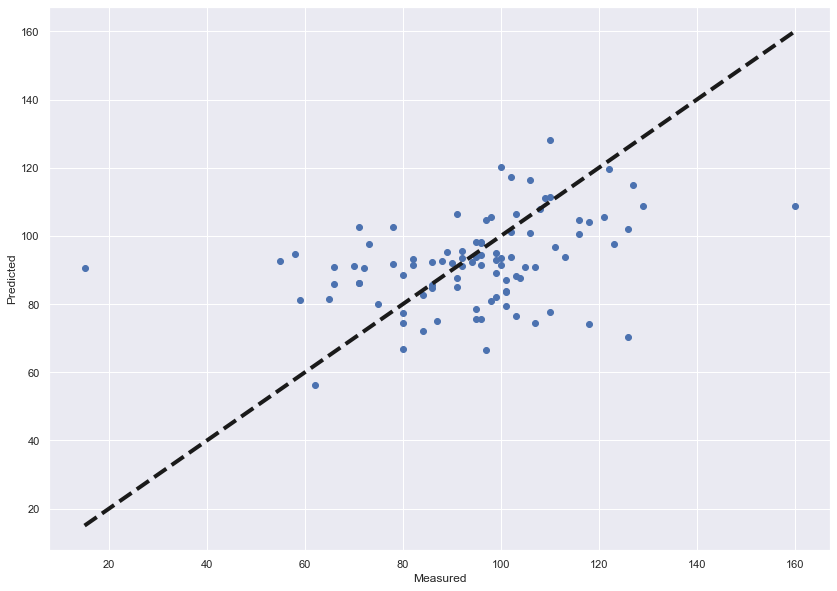

In [264]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Training data Accuracy :  0.660922295695024
Testing data  Accuracy :  0.01431286450046787


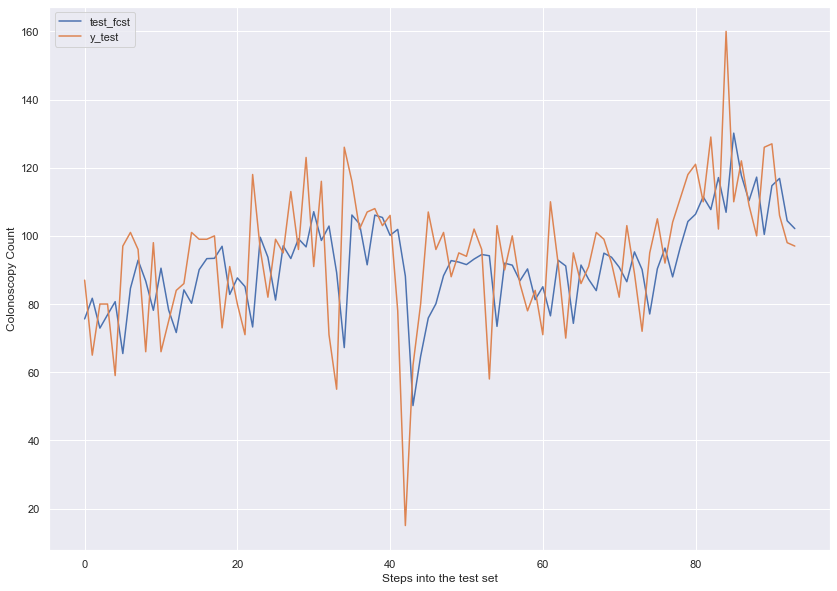

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit Linear Regression model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

#Prediction
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Assign variable for plotting later on
lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Test_Fcst vs test data',fontsize=14)
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy Count')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [266]:
#Prediction
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2_lr = r2_score(y_train, train_fcst)
test_r2_lr = r2_score(y_test, test_fcst)
print(train_r2_lr,test_r2_4)

0.660922295695024 0.025829089086573442
